# Libraries

In [1]:
import pandas as pd
import numpy as np
import Classifications
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
''''Arousal describes intensity and energy in music; Valence describes the spectrum of emotions in music (from sad to happy)'''

"'Arousal describes intensity and energy in music; Valence describes the spectrum of emotions in music (from sad to happy)"

# Reading Data

In [3]:
music2017=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/featuresdf.csv')

In [4]:
music2018=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/top2018.csv')

In [5]:
music2019=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/top50.csv',encoding='latin-1')

In [6]:
music17_18=pd.read_csv('/Users/islaam/Documents/DATA_SCIENCE/DATA_ANALYSIS/IRONHACK/Project-Week-5-Your-Own-Project/Data/featuresdf.csv')

# Cleaning Data

In [7]:
music2018.drop(columns=['id','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

In [8]:
music2019.drop(columns=['Unnamed: 0','Genre','Beats.Per.Minute','Loudness..dB..','Liveness','Length.'],inplace=True)

In [9]:
music2017.drop(columns=['key','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

In [10]:
music17_18.drop(columns=['id','key','loudness','mode','liveness','tempo','duration_ms','time_signature'],inplace=True)

# Applying Functions

In [11]:
music2018['label_energy'] = music2018['energy'].apply(Classifications.quantile_label)

In [12]:
music2018['label_valence'] = music2018['valence'].apply(Classifications.quantile_label)

In [13]:
music2017['label_energy'] = music2017['energy'].apply(Classifications.quantile_label)

In [14]:
music2017['label_valence'] = music2017['valence'].apply(Classifications.quantile_label)

In [15]:
music2019['label_energy'] = music2019['Energy'].apply(Classifications.quantile_label1)

In [16]:
music2019['label_valence'] = music2019['Valence.'].apply(Classifications.quantile_label1)

In [17]:
music17_18['label_energy'] = music17_18['energy'].apply(Classifications.quantile_label)

In [18]:
music17_18['label_valence'] = music17_18['valence'].apply(Classifications.quantile_label)

In [19]:
music2017['mode'] = music2017.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [20]:
music2018['mode'] = music2018.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [21]:
music2019['mode'] = music2019.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

In [22]:
music17_18['mode'] = music17_18.apply(lambda x: Classifications.first(x.label_energy, x.label_valence), axis=1)

# Statistics

In [23]:
music2019.head(30)

,Track.Name,Artist.Name,Energy,Danceability,Valence.,Acousticness..,Speechiness.,Popularity,label_energy,label_valence,mode
0,Señorita,Shawn Mendes,55,76,75,4,3,79,H,H,passionate
1,China,Anuel AA,81,79,61,8,9,92,VH,H,ambitious
2,boyfriend (with Social House),Ariana Grande,80,40,70,12,46,85,VH,H,ambitious
3,Beautiful People (feat. Khalid),Ed Sheeran,65,64,55,12,19,86,H,H,passionate
4,Goodbyes (Feat. Young Thug),Post Malone,65,58,18,45,7,94,H,VL,discontented
5,I Don't Care (with Justin Bieber),Ed Sheeran,68,80,84,9,4,84,H,VH,happy
6,Ransom,Lil Tecca,64,75,23,2,29,92,H,VL,discontented
7,How Do You Sleep?,Sam Smith,68,48,35,15,9,90,H,L,distrustful
8,Old Town Road - Remix,Lil Nas X,62,88,64,5,10,87,H,H,passionate
9,bad guy,Billie Eilish,43,70,56,33,38,95,L,H,impressed


In [24]:
m17=music2017.groupby('mode').count().drop(columns=['id', 'name', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'label_energy',
       'label_valence'])

In [25]:
m18=music2018.groupby('mode').count().drop(columns=['name', 'danceability', 'energy', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'label_energy',
       'label_valence'])

In [26]:
m19=music2019.groupby('mode').count().drop(columns=['Track.Name', 'Artist.Name', 'Danceability', 'Valence.',
       'Acousticness..', 'Speechiness.', 'label_energy',
       'label_valence'])

In [27]:
m17_18=music17_18.groupby('mode').count().drop(columns=['name','danceability','energy','speechiness','acousticness','instrumentalness','valence','label_energy','label_valence'])

In [28]:
pop19=music2019[['Track.Name','mode','Popularity','Artist.Name']]
pop19.sort_values(by=['Popularity'],ascending=False,inplace=True)
pop19

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Track.Name,mode,Popularity,Artist.Name
9,bad guy,impressed,95,Billie Eilish
4,Goodbyes (Feat. Young Thug),discontented,94,Post Malone
10,Callaita,discontented,93,Bad Bunny
14,Money In The Grave (Drake ft. Rick Ross),depressed,92,Drake
1,China,ambitious,92,Anuel AA
6,Ransom,discontented,92,Lil Tecca
36,Otro Trago,passionate,91,Sech
21,Panini,distrustful,91,Lil Nas X
20,Piece Of Your Heart,passionate,91,MEDUZA
19,Truth Hurts,distrustful,91,Lizzo


In [29]:
m17.reset_index(inplace=True)

In [30]:
m18.reset_index(inplace=True)

In [31]:
m19.reset_index(inplace=True)

In [32]:
m17_18.reset_index(inplace=True)

In [33]:
m17.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [34]:
m18.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [35]:
m19.rename(columns={'Energy':'count' , 'mode':'mode'},inplace=True)

In [36]:
m19

,mode,count,Popularity
0,ambitious,6,6
1,angry and afraid,1,1
2,depressed,2,2
3,discontented,4,4
4,distrustful,10,10
5,excited,5,5
6,happy,3,3
7,hopeful,1,1
8,impressed,2,2
9,passionate,10,10


In [37]:
m19['count']=m19['count'].apply(lambda x : x*2 )

In [38]:
m17_18.rename(columns={'artists':'count' , 'mode':'mode'},inplace=True)

In [39]:
sns.set(rc={'figure.figsize':(30,20)})

In [40]:
m17.sort_values(by=['count'],ascending=False,inplace=True)
m18.sort_values(by=['count'],ascending=False,inplace=True)
m19.sort_values(by=['count'],ascending=False,inplace=True)

Text(0.5, 1.0, '2017')

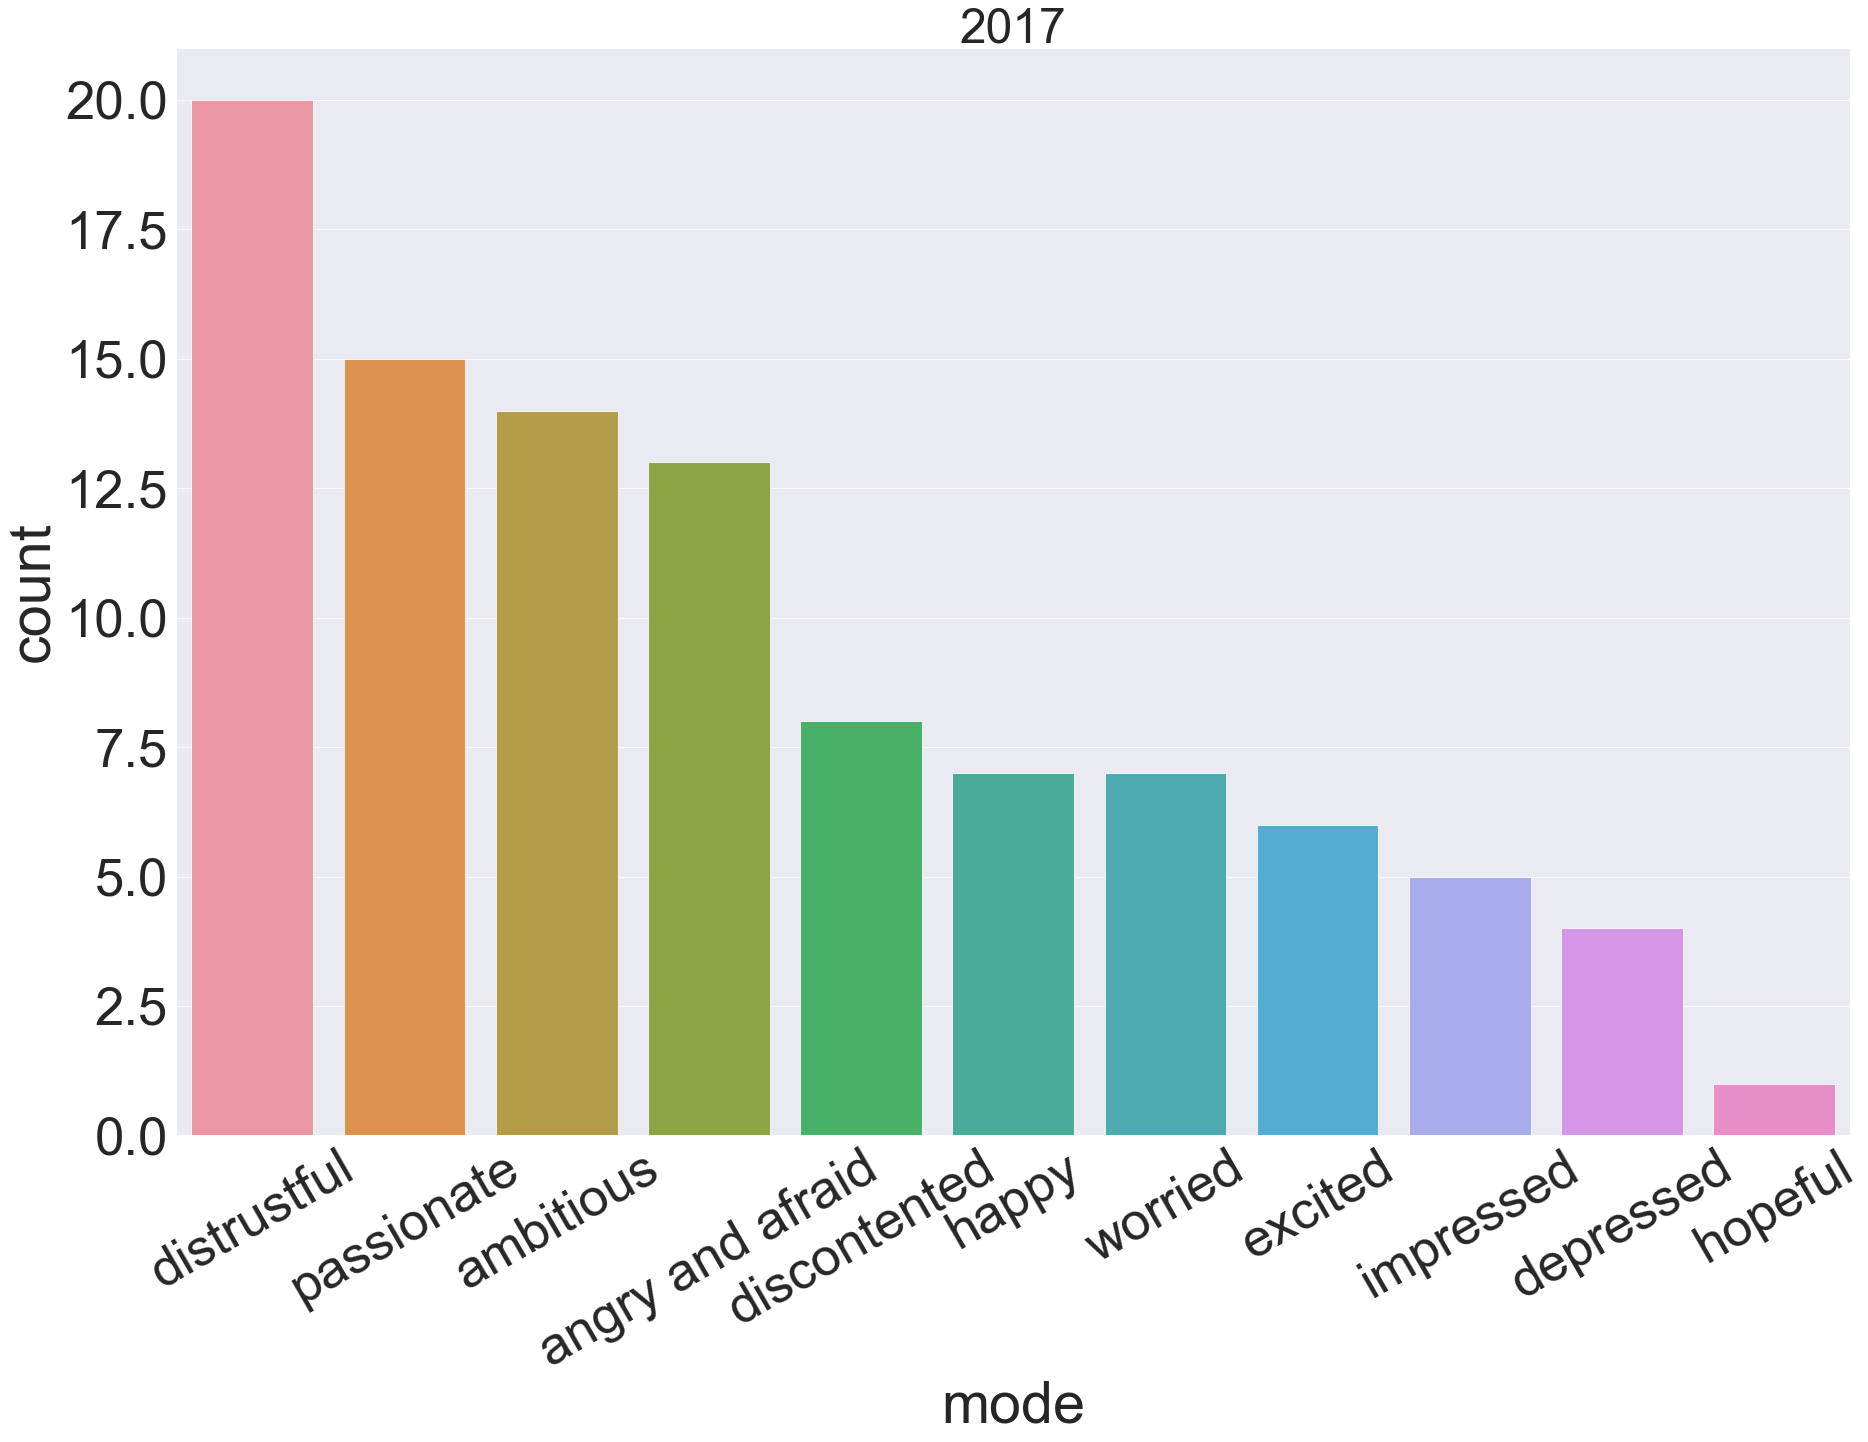

In [45]:
sns.barplot(x='mode',y='count',data=m17)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=5)
plt.title('2017')

Text(0.5, 1.0, '2018')

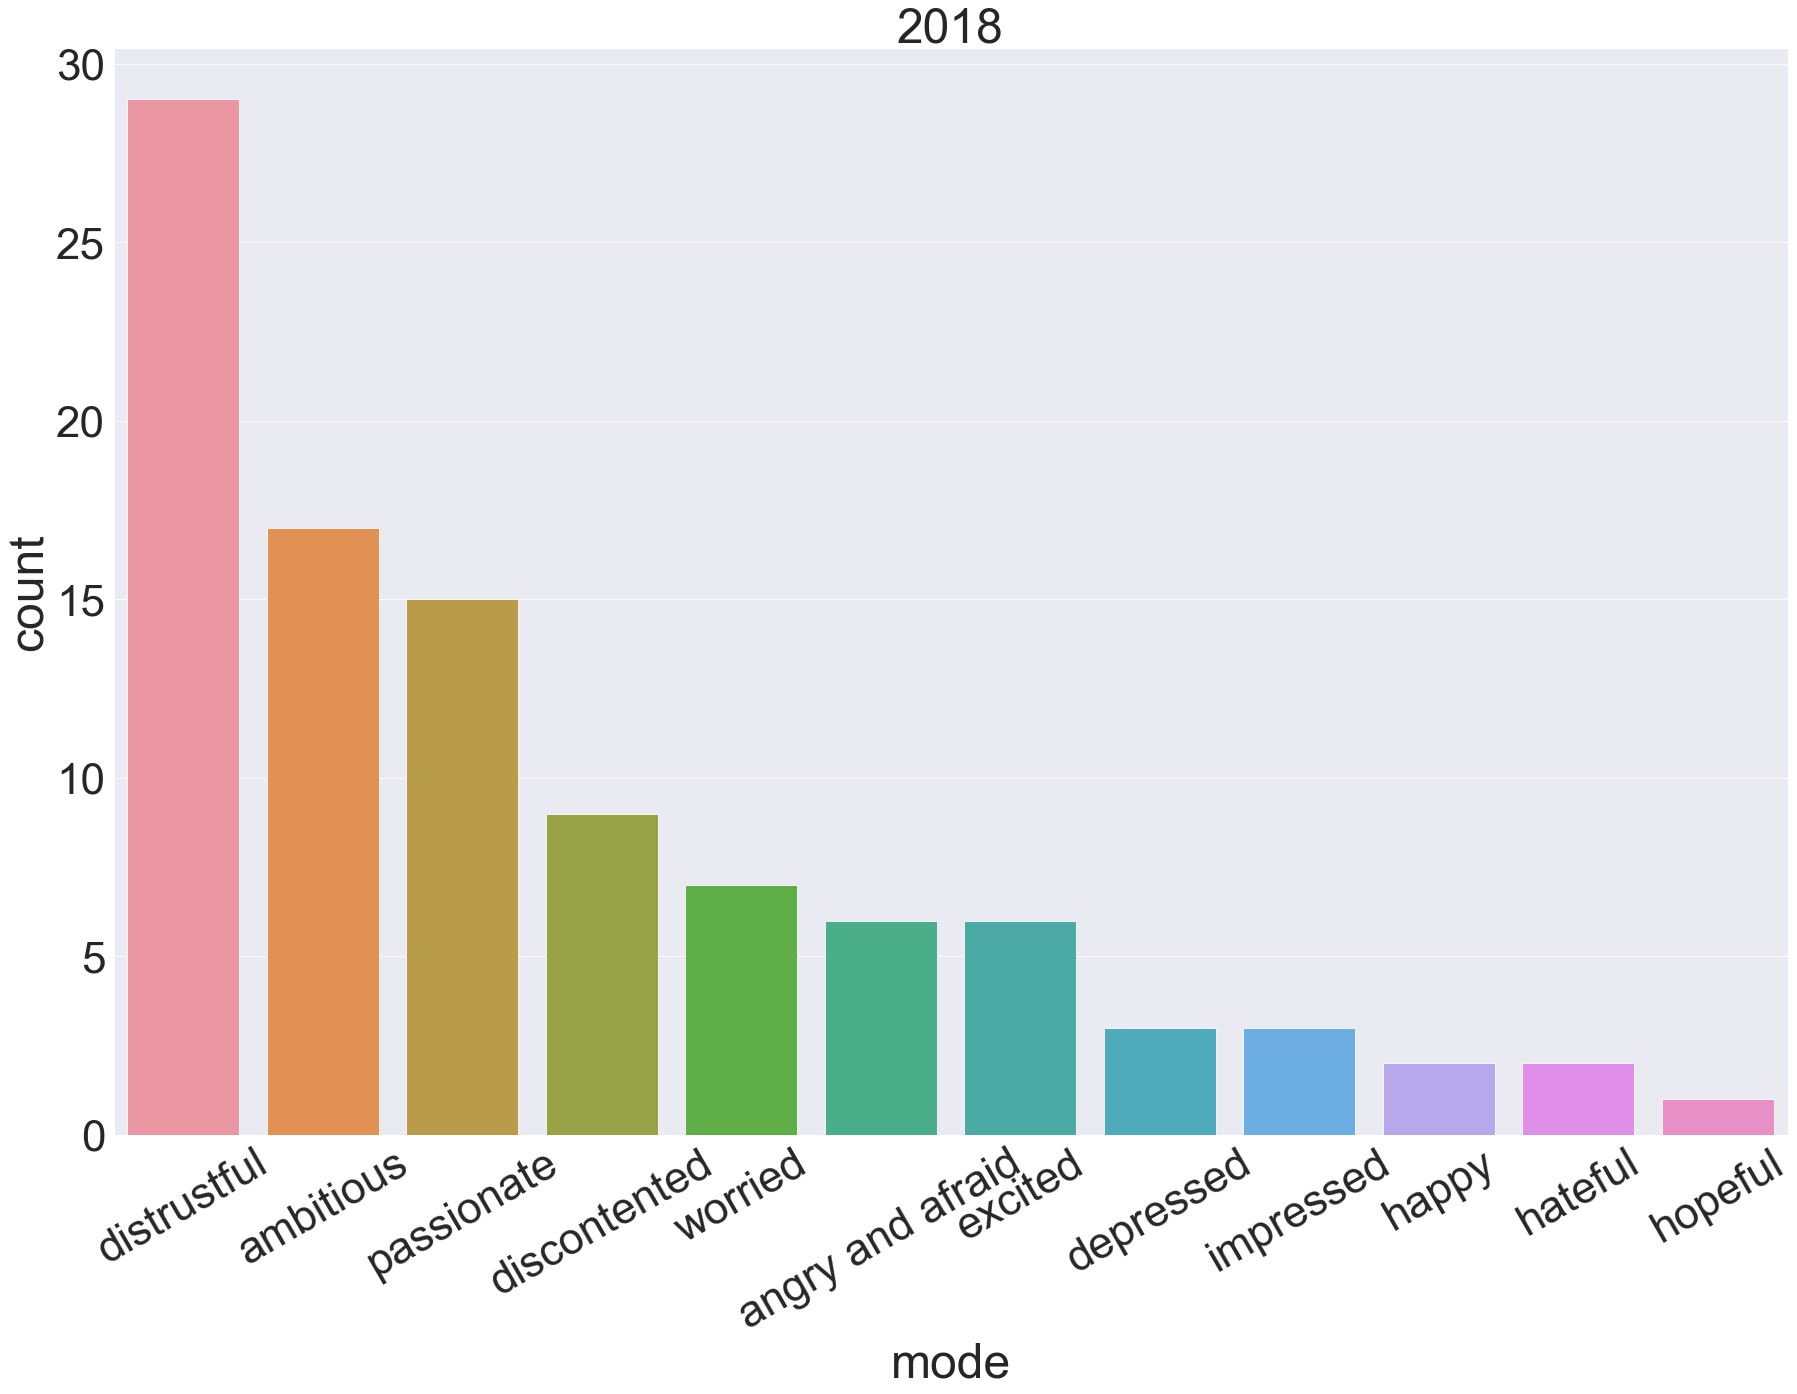

In [46]:
sns.barplot(x='mode',y='count',data=m18)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=5)
plt.title('2018')

Text(0.5, 1.0, '2019')

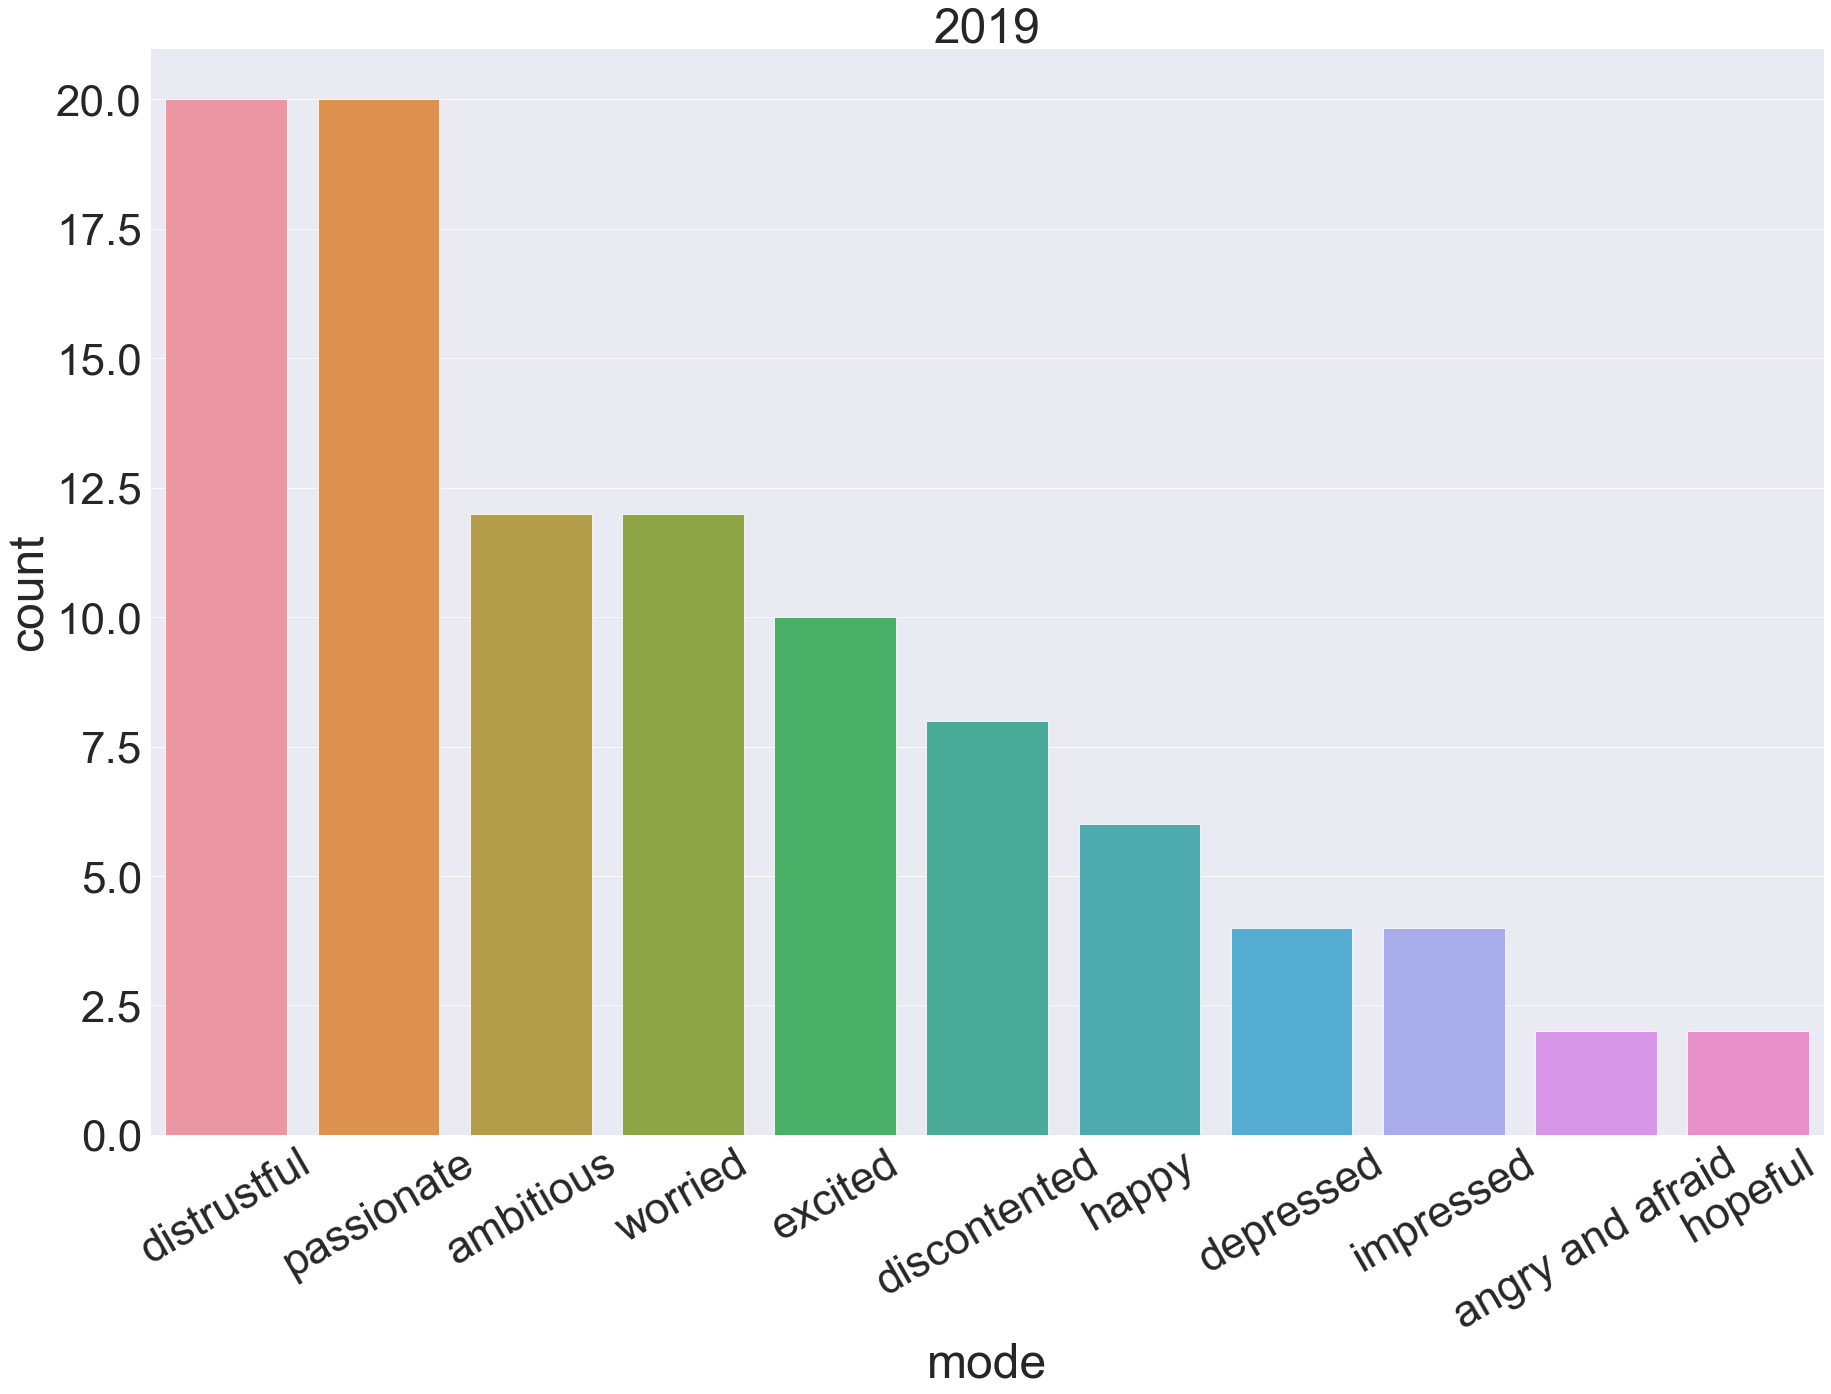

In [47]:
sns.barplot(x='mode',y='count',data=m19)
plt.xticks(rotation=30)
sns.set_context("paper", font_scale=5)
plt.title('2019')

In [302]:
m17.count

<bound method DataFrame.count of                                      mode  count
0          ambitious and feeling superior     14
1               angry, alarmed and afraid     13
2   depressed and miserably uncomfortable      4
3              discontented and disgusted      8
4               distrustful and indignant     20
5                  excited and courageous      6
6                    happy and determined      7
7                     hopeful and pleased      1
8                 impressed and attentive      5
9            passionate and light hearted     15
10              worried and feeling guilt      7>

In [303]:
m18.count

<bound method DataFrame.count of                                      mode  count
0          ambitious and feeling superior     17
1               angry, alarmed and afraid      6
2   depressed and miserably uncomfortable      3
3              discontented and disgusted      9
4               distrustful and indignant     29
5                  excited and courageous      6
6                    happy and determined      2
7               hateful and disrespectful      2
8                     hopeful and pleased      1
9                 impressed and attentive      3
10           passionate and light hearted     15
11              worried and feeling guilt      7>

In [304]:
m19.count

<bound method DataFrame.count of                                      mode  count  Popularity
0          ambitious and feeling superior      6           6
1               angry, alarmed and afraid      1           1
2   depressed and miserably uncomfortable      2           2
3              discontented and disgusted      4           4
4               distrustful and indignant     10          10
5                  excited and courageous      5           5
6                    happy and determined      3           3
7                     hopeful and pleased      1           1
8                 impressed and attentive      2           2
9            passionate and light hearted     10          10
10              worried and feeling guilt      6           6>

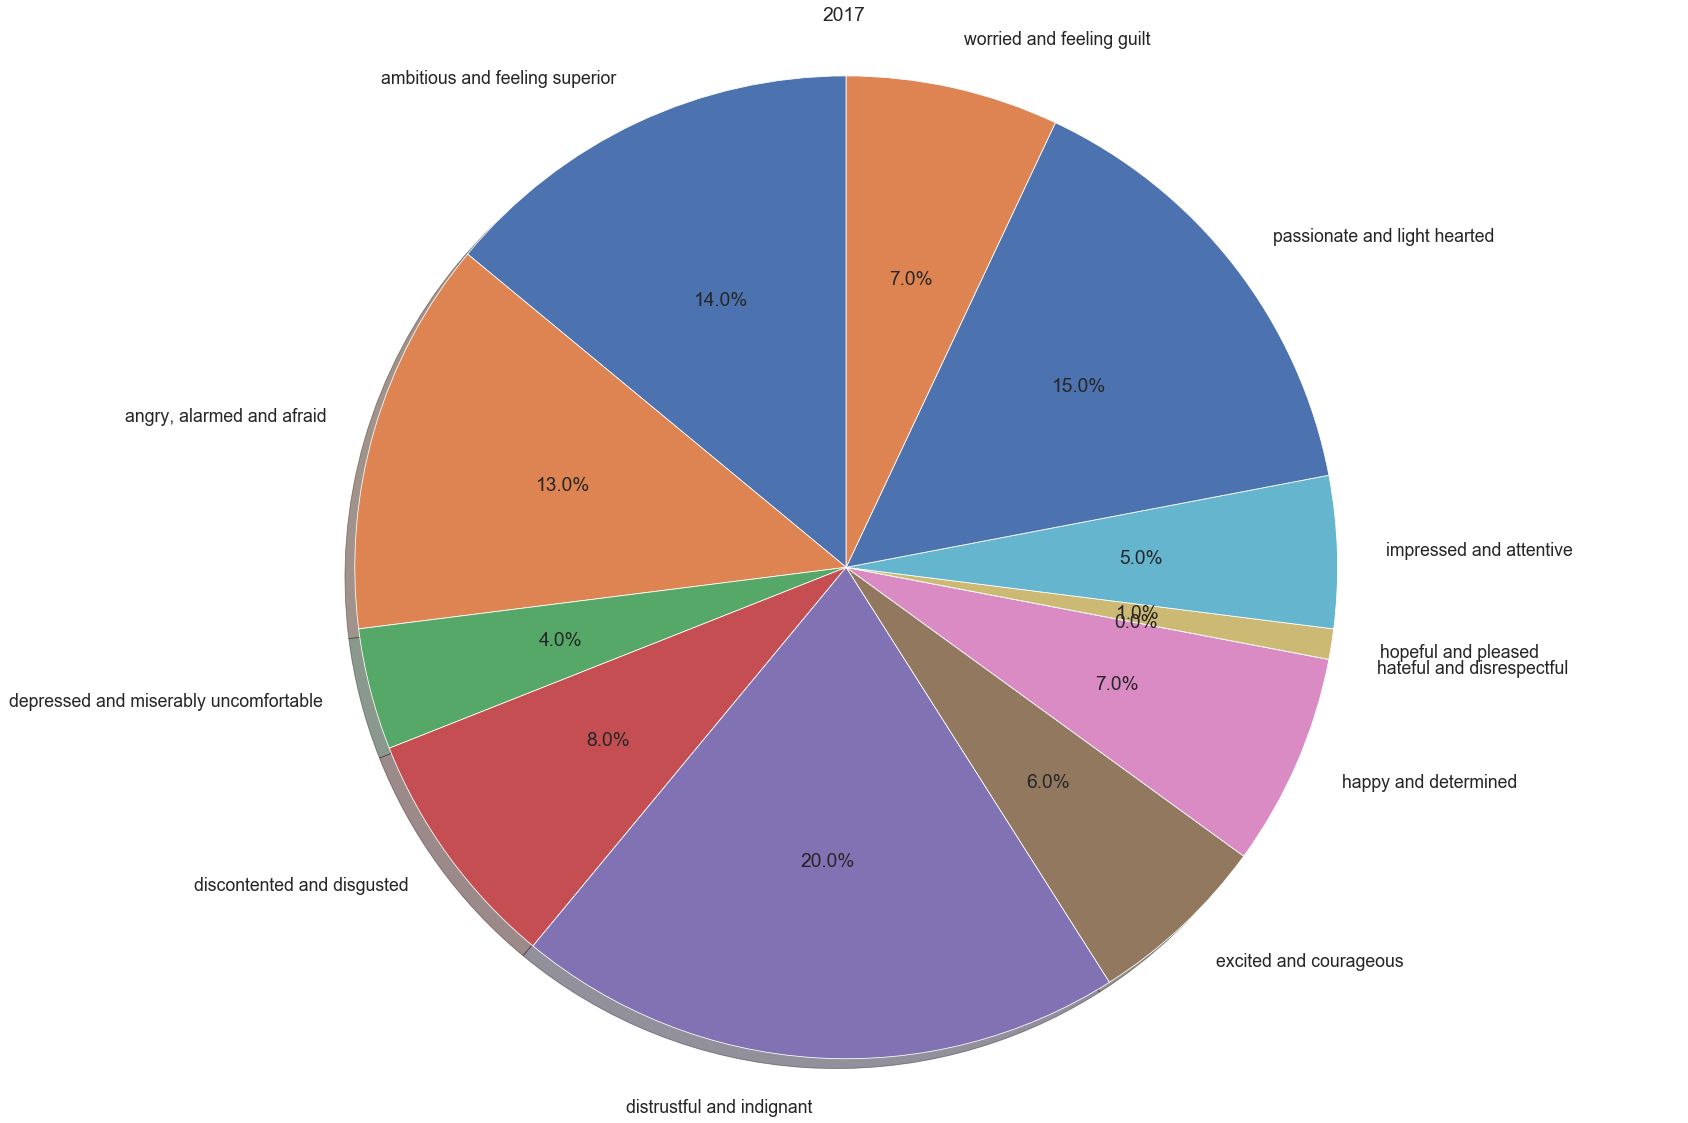

In [192]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [14,13,4,8,20,6,7,0,1,5,15,7]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2017')
plt.show()

In [193]:
m18.count

<bound method DataFrame.count of                                      mode  count
4               distrustful and indignant     29
0          ambitious and feeling superior     17
10           passionate and light hearted     15
3              discontented and disgusted      9
11              worried and feeling guilt      7
1               angry, alarmed and afraid      6
5                  excited and courageous      6
2   depressed and miserably uncomfortable      3
9                 impressed and attentive      3
6                    happy and determined      2
7               hateful and disrespectful      2
8                     hopeful and pleased      1>

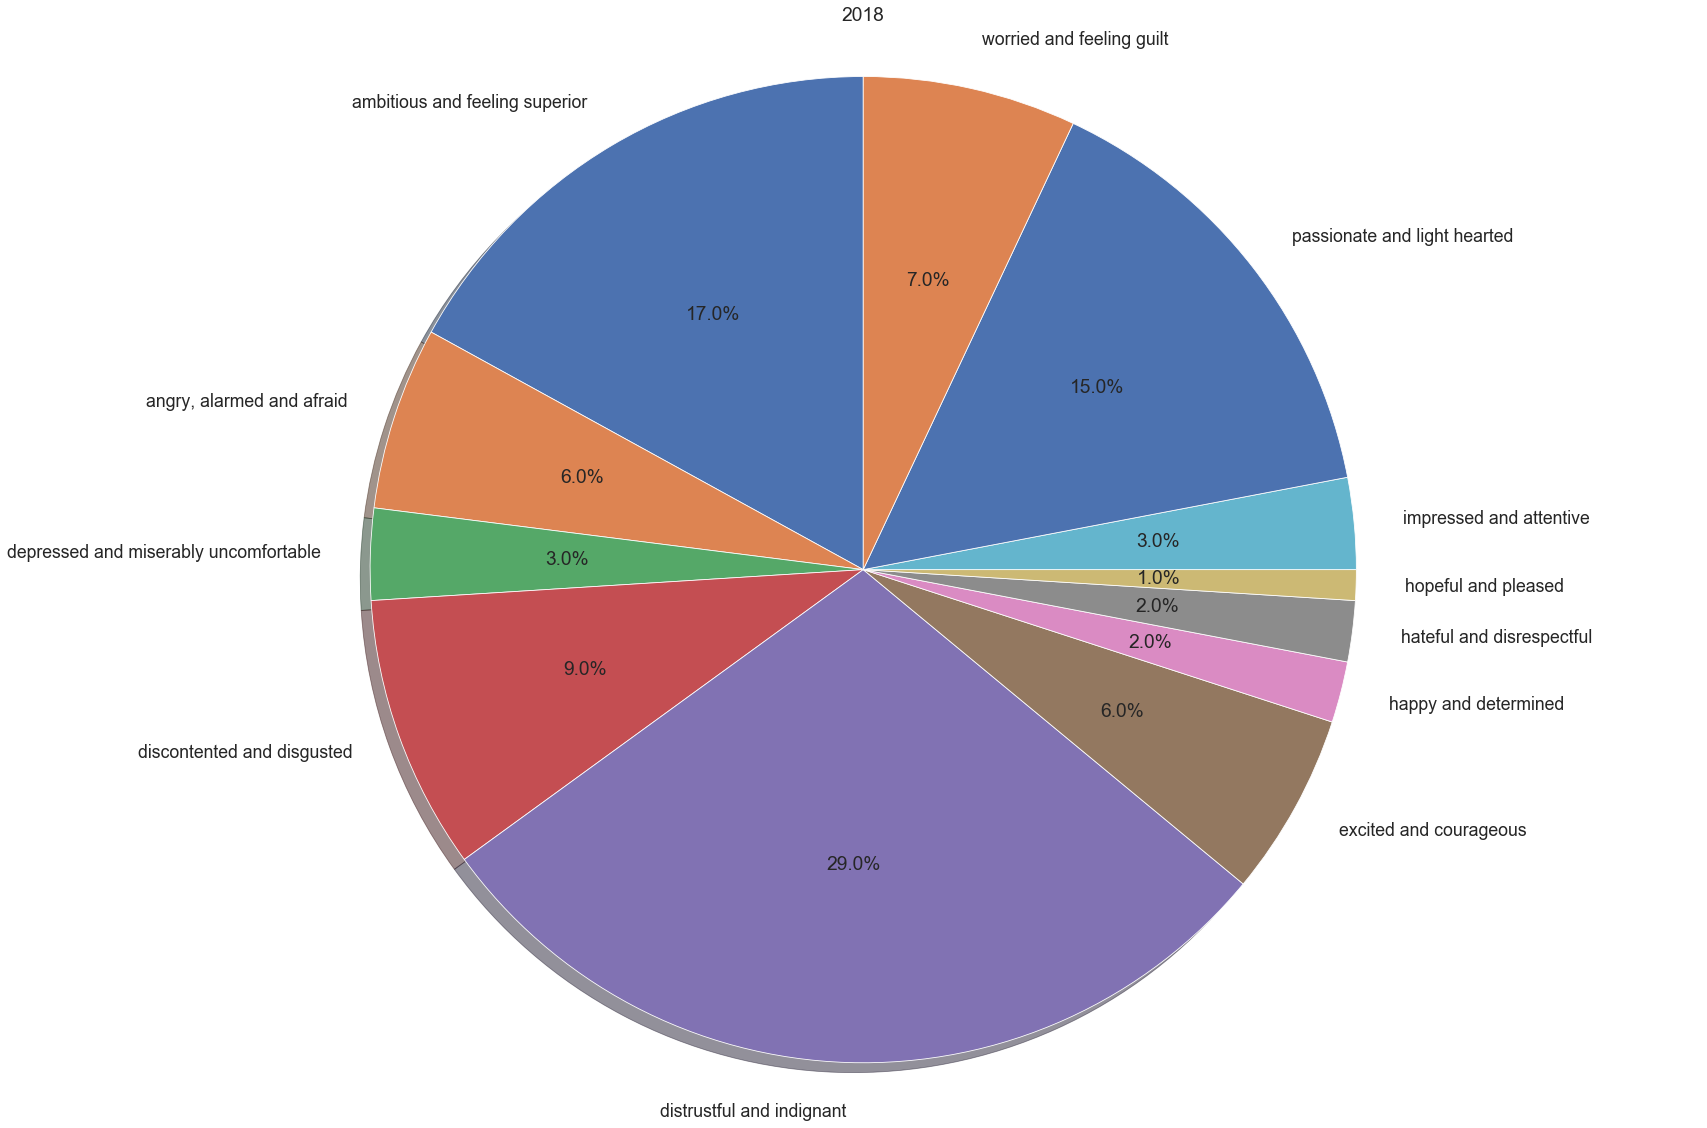

In [194]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [17,6,3,9,29,6,2,2,1,3,15,7]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2018')
plt.show()

In [195]:
m19.mode

<bound method DataFrame.mode of                                      mode  count  Popularity
4               distrustful and indignant     20          10
9            passionate and light hearted     20          10
0          ambitious and feeling superior     12           6
10              worried and feeling guilt     12           6
5                  excited and courageous     10           5
3              discontented and disgusted      8           4
6                    happy and determined      6           3
2   depressed and miserably uncomfortable      4           2
8                 impressed and attentive      4           2
1               angry, alarmed and afraid      2           1
7                     hopeful and pleased      2           1>

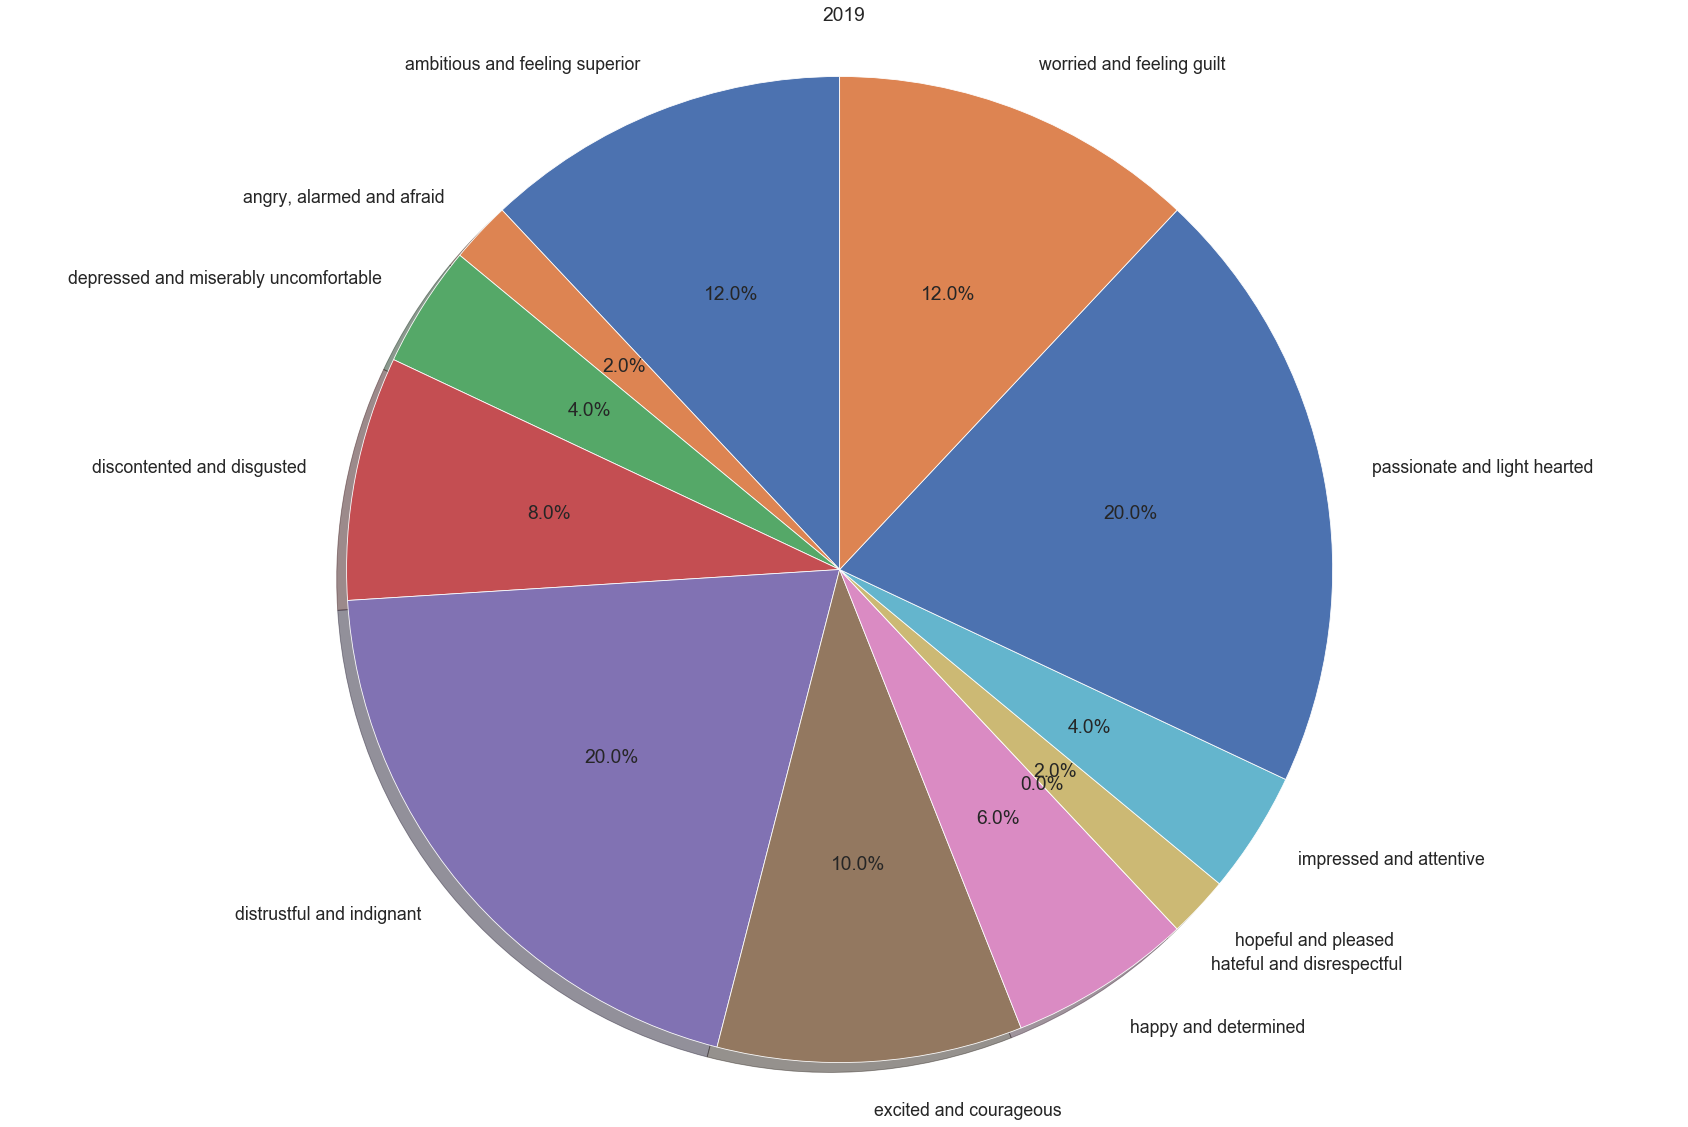

In [196]:
labels = ['ambitious and feeling superior', 'angry, alarmed and afraid', 'depressed and miserably uncomfortable','discontented and disgusted','distrustful and indignant','excited and courageous','happy and determined','hateful and disrespectful','hopeful and pleased','impressed and attentive','passionate and light hearted','worried and feeling guilt']
sizes = [6,1,2,4,10,5,3,0,1,2,10,6]
explode = (0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('2019')
plt.show()

In [197]:
pop19.head(5)

,Track.Name,mode,Popularity,Artist.Name
9,bad guy,impressed and attentive,95,Billie Eilish
4,Goodbyes (Feat. Young Thug),discontented and disgusted,94,Post Malone
10,Callaita,discontented and disgusted,93,Bad Bunny
14,Money In The Grave (Drake ft. Rick Ross),depressed and miserably uncomfortable,92,Drake
1,China,ambitious and feeling superior,92,Anuel AA


In [198]:
pop19.tail(5)

,Track.Name,mode,Popularity,Artist.Name
15,No Guidance (feat. Drake),depressed and miserably uncomfortable,82,Chris Brown
38,Sucker,happy and determined,80,Jonas Brothers
0,Señorita,passionate and light hearted,79,Shawn Mendes
39,"fuck, i'm lonely (with Anne-Marie) - from 13 ...",passionate and light hearted,78,Lauv
25,If I Can't Have You,excited and courageous,70,Shawn Mendes


In [199]:
m19

,mode,count,Popularity
4,distrustful and indignant,20,10
9,passionate and light hearted,20,10
0,ambitious and feeling superior,12,6
10,worried and feeling guilt,12,6
5,excited and courageous,10,5
3,discontented and disgusted,8,4
6,happy and determined,6,3
2,depressed and miserably uncomfortable,4,2
8,impressed and attentive,4,2
1,"angry, alarmed and afraid",2,1


In [49]:
years=[2017,2018,2019]
ambitious=[14,17,12]
angry=[13,6,2]
depressed=[4,3,4]
disgusted=[8,9,8]
distrustful=[20,29,20]
excited=[6,6,10]
happy=[7,2,6]
hateful=[0,2,0]
hopeful=[1,1,2]
impressed=[5,3,4]
passionate=[15,15,20]
worried=[7,7,12]

In [50]:
modes=[ambitious,angry,depressed,disgusted,distrustful,excited,happy,hateful,hopeful,impressed,passionate,worried]


([<matplotlib.axis.XTick at 0x11f06fb90>,
 <a list of 3 Text xticklabel objects>)

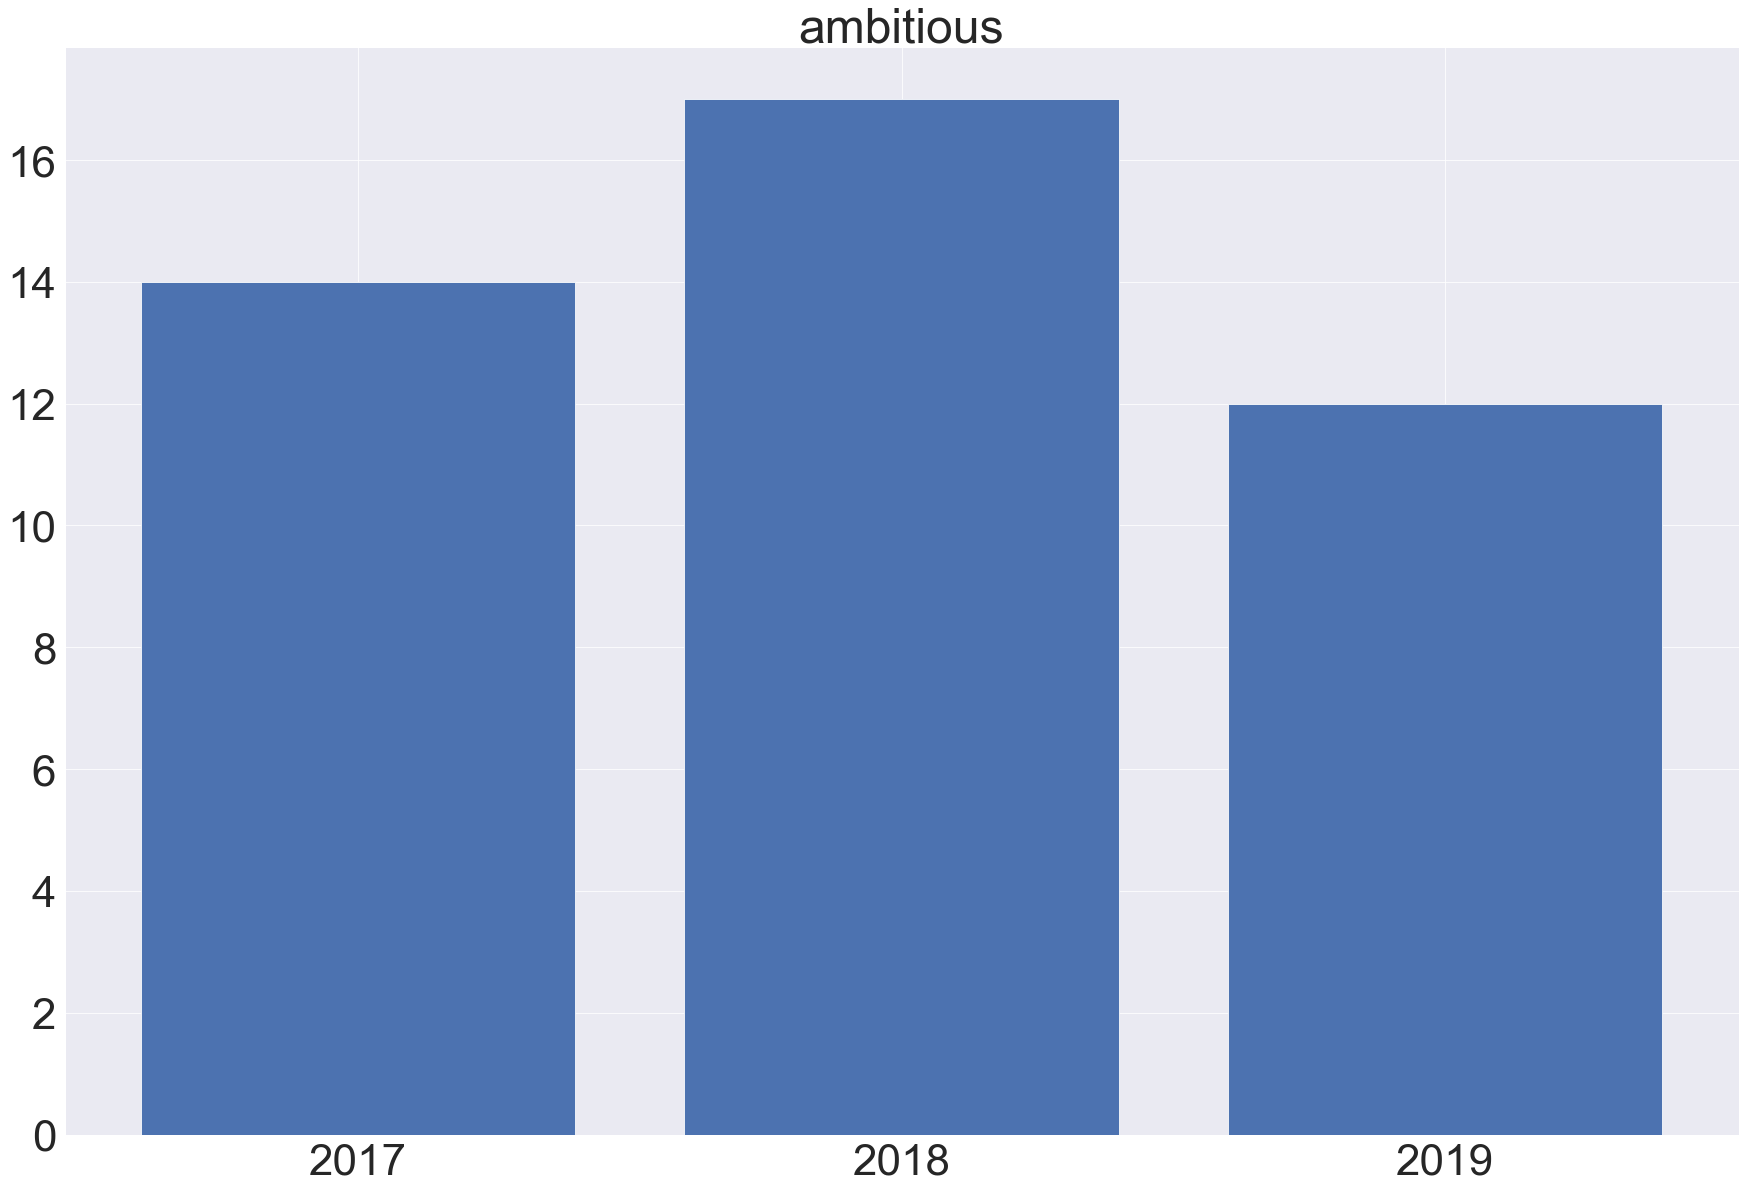

In [53]:
plt.bar(years,ambitious)
sns.set_context("paper", font_scale=5)
plt.title('ambitious')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x120981150>,
 <a list of 3 Text xticklabel objects>)

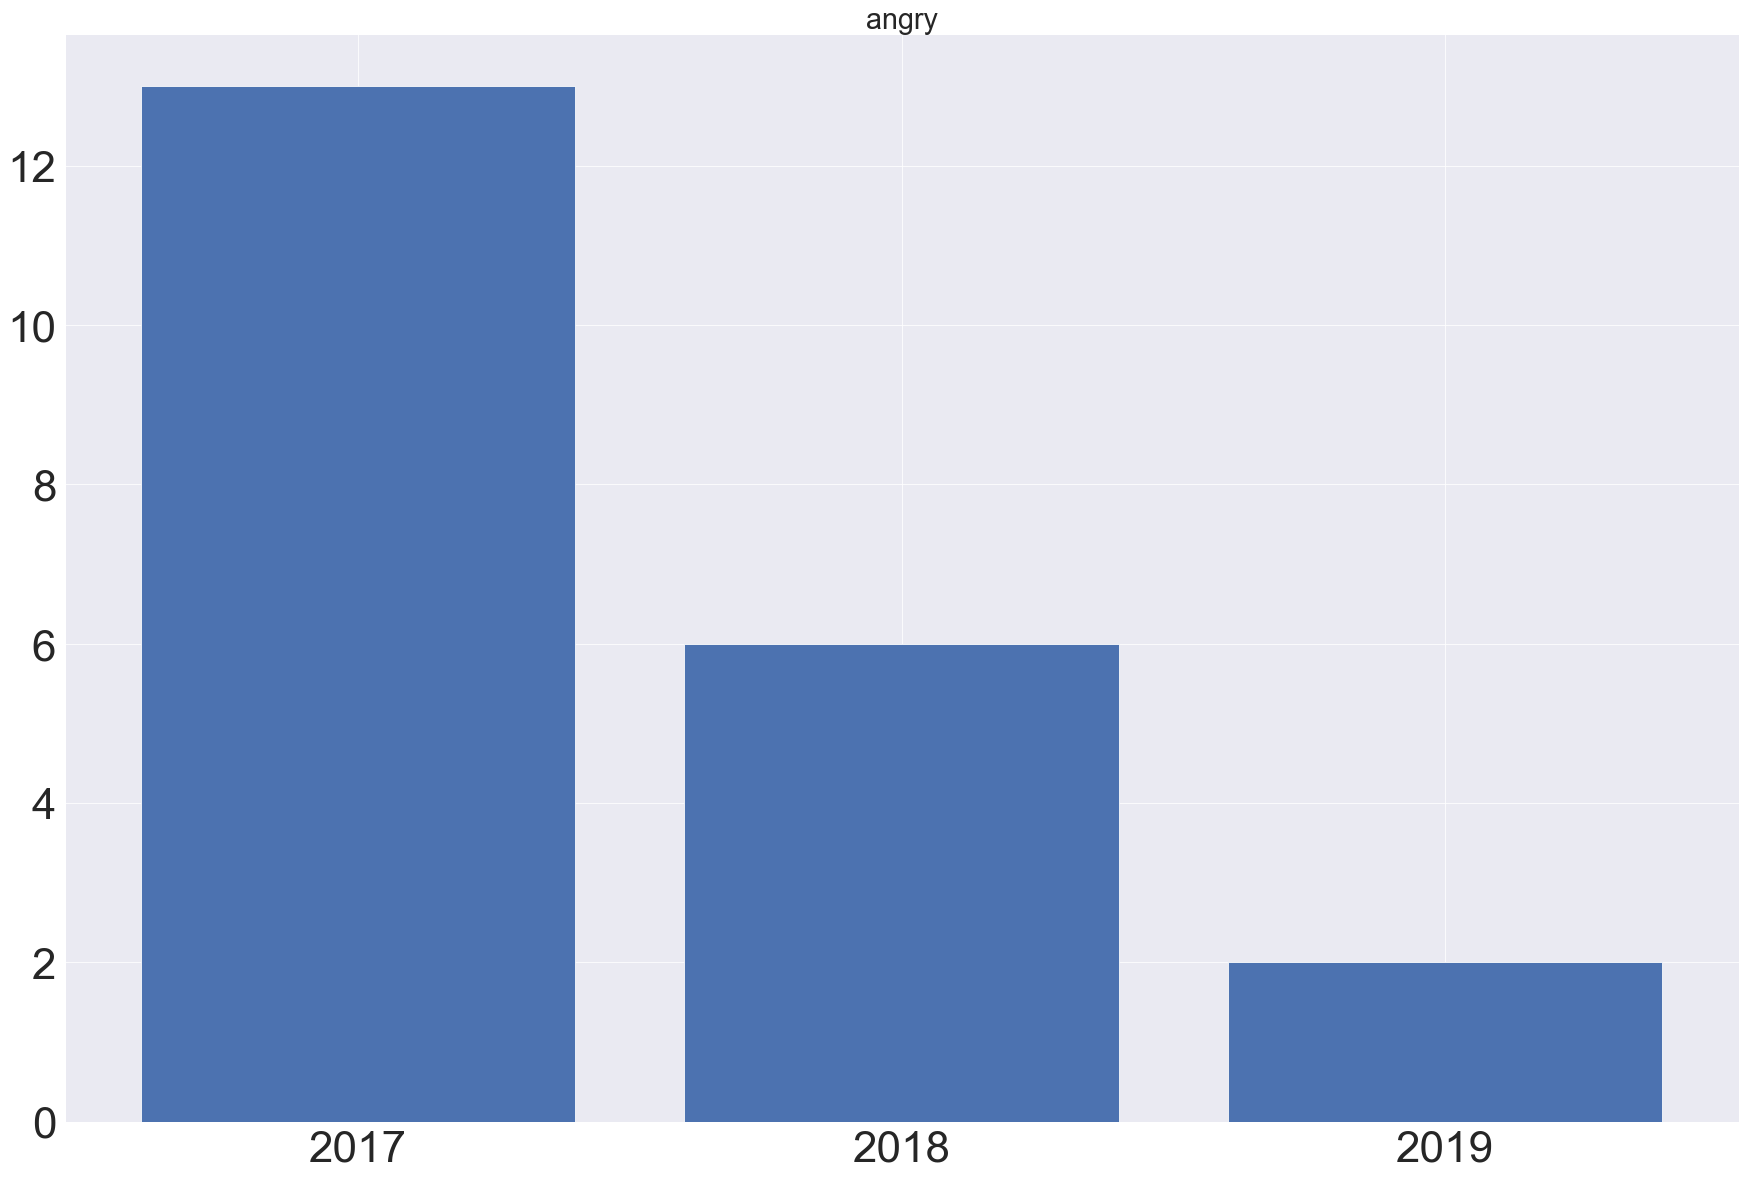

In [54]:
plt.bar(years,angry)
sns.set_context("paper", font_scale=3)
plt.title('angry')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1209d8bd0>,
 <a list of 3 Text xticklabel objects>)

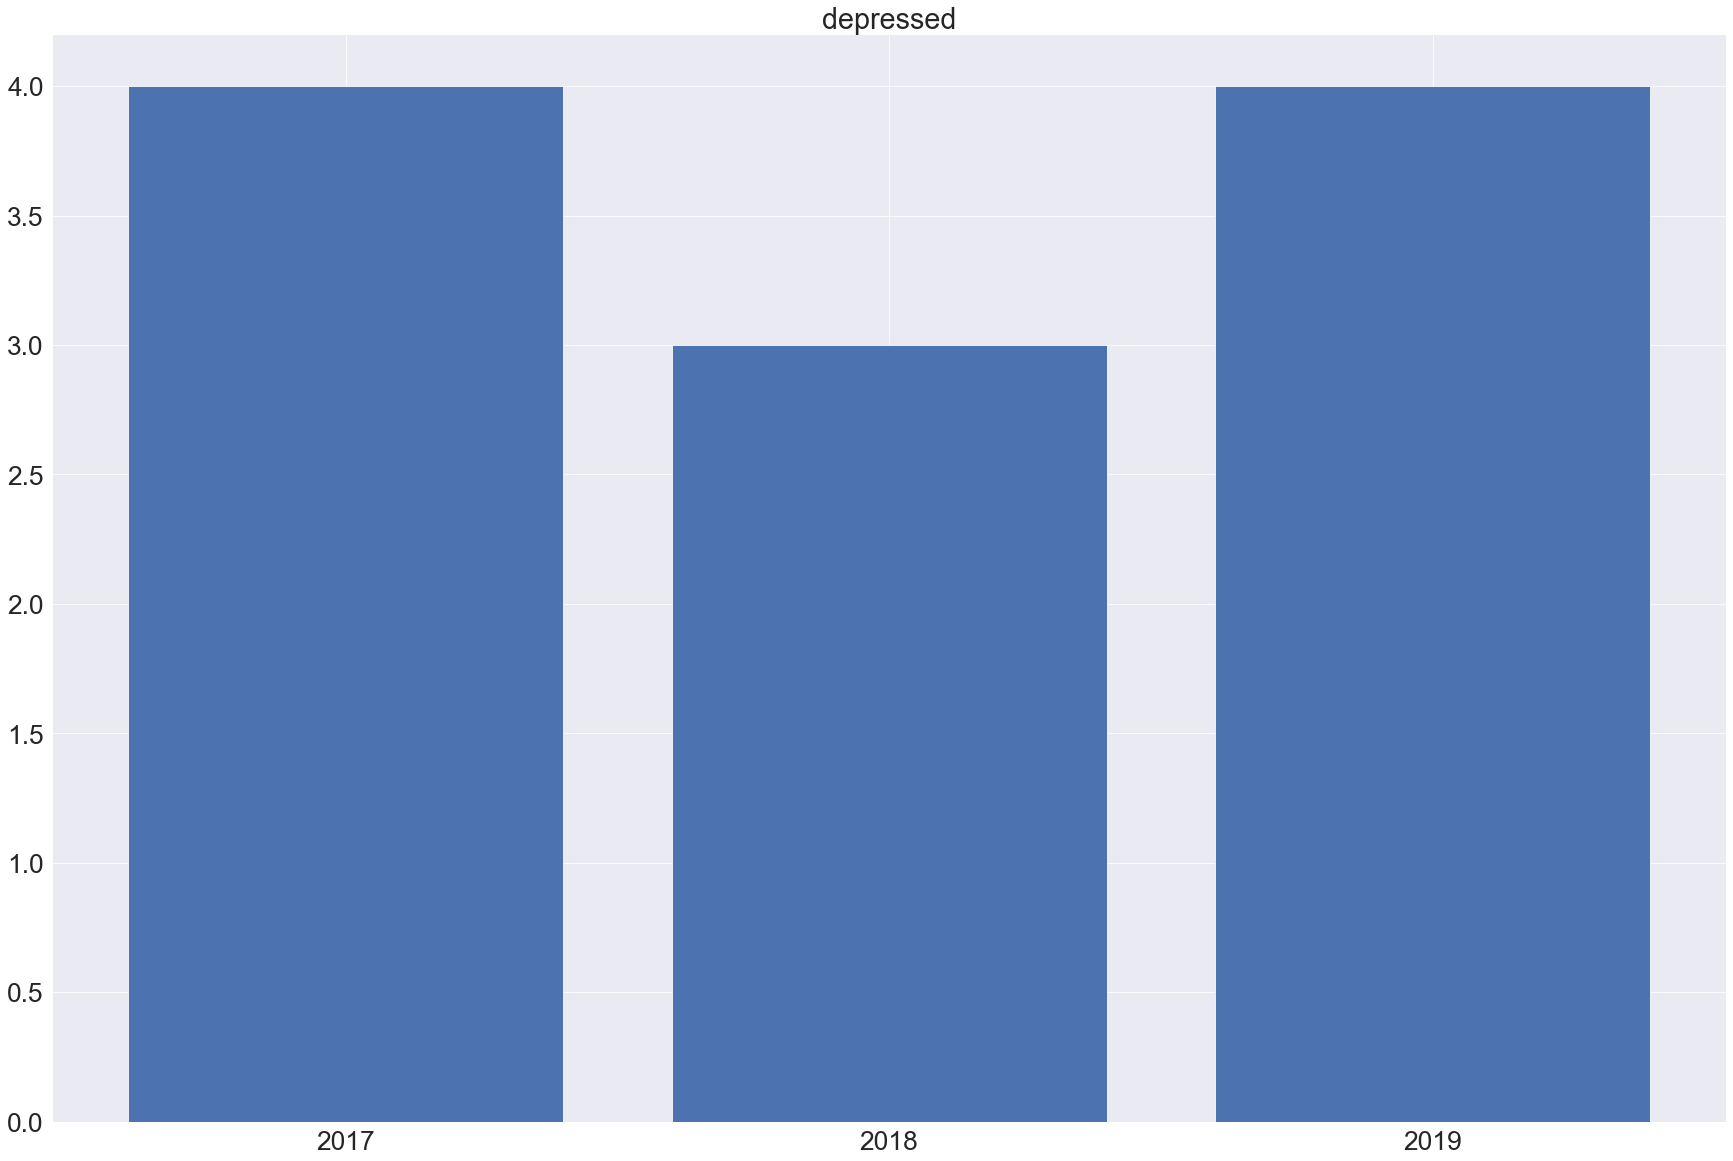

In [55]:
plt.bar(years,depressed)
sns.set_context("paper", font_scale=3)
plt.title('depressed')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x11d73e8d0>,
 <a list of 3 Text xticklabel objects>)

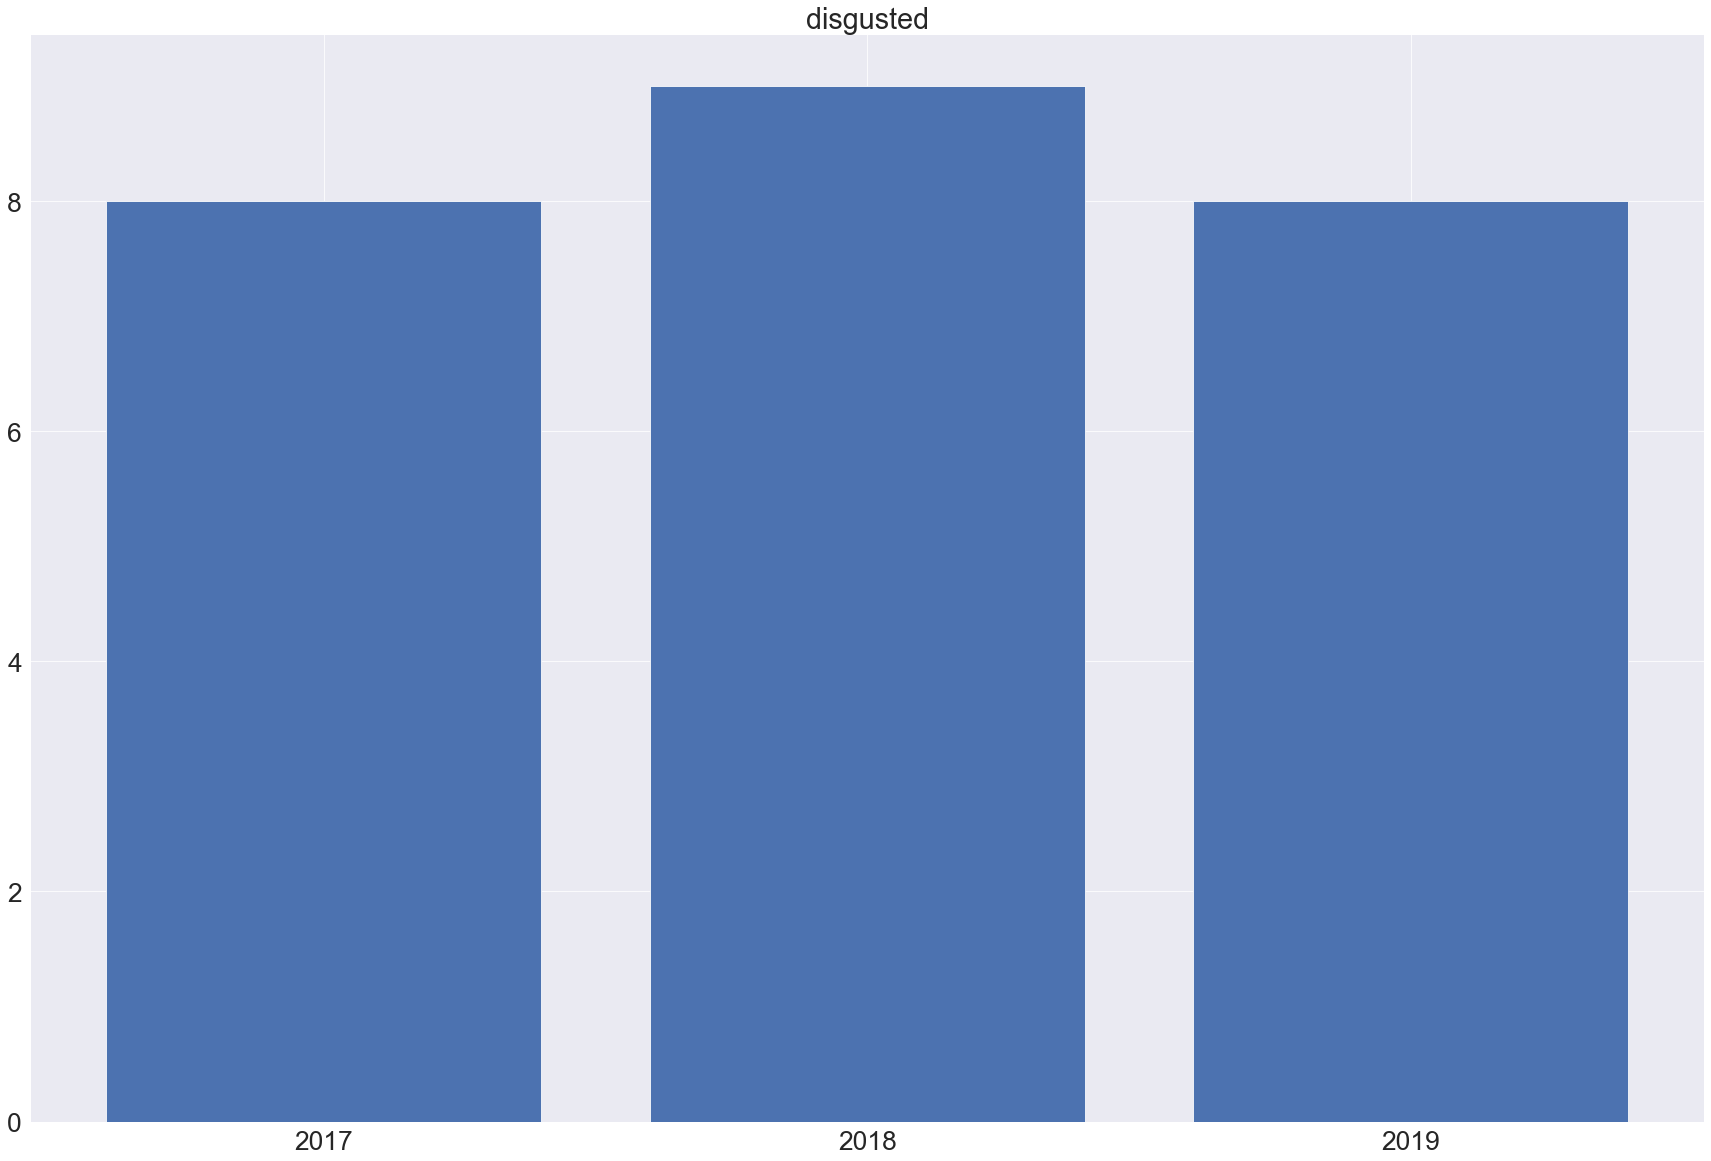

In [56]:
plt.bar(years,disgusted)
sns.set_context("paper", font_scale=3)
plt.title('disgusted')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1211e18d0>,
 <a list of 3 Text xticklabel objects>)

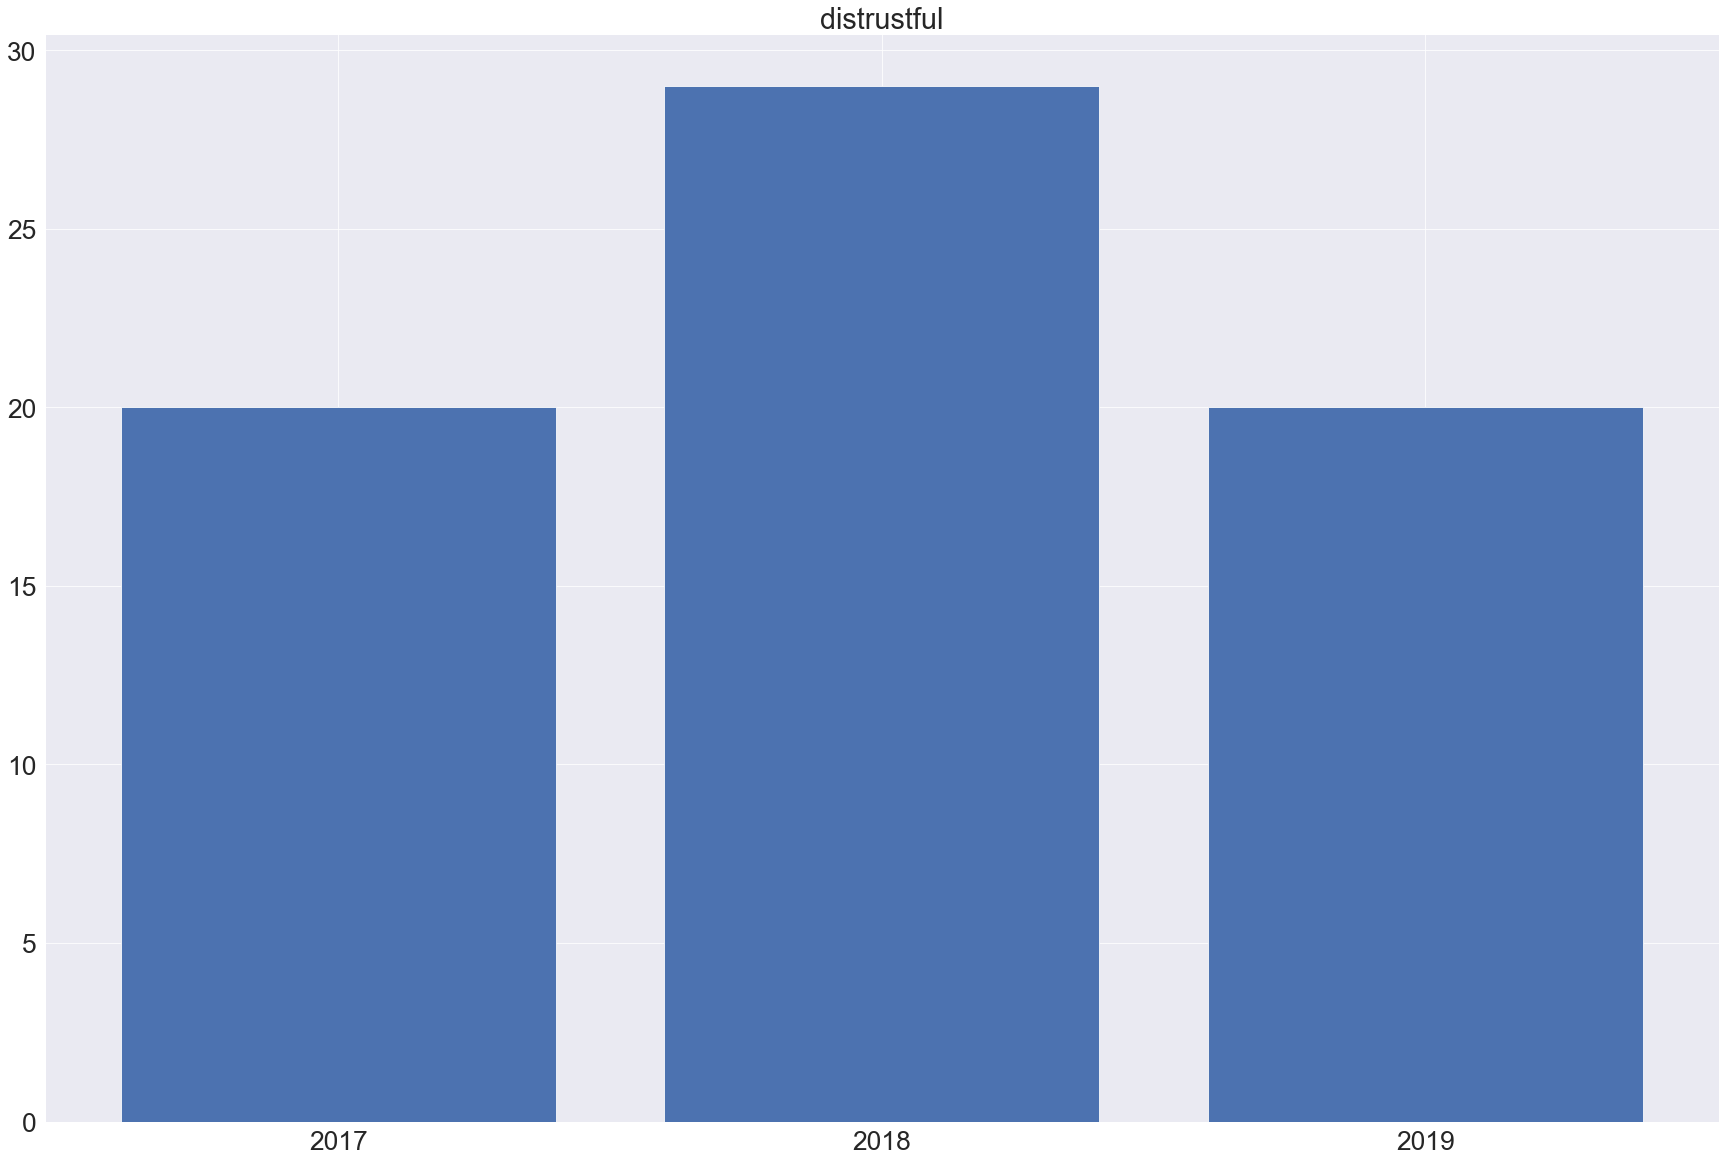

In [57]:
plt.bar(years,distrustful)
sns.set_context("paper", font_scale=3)
plt.title('distrustful')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1219c4290>,
 <a list of 3 Text xticklabel objects>)

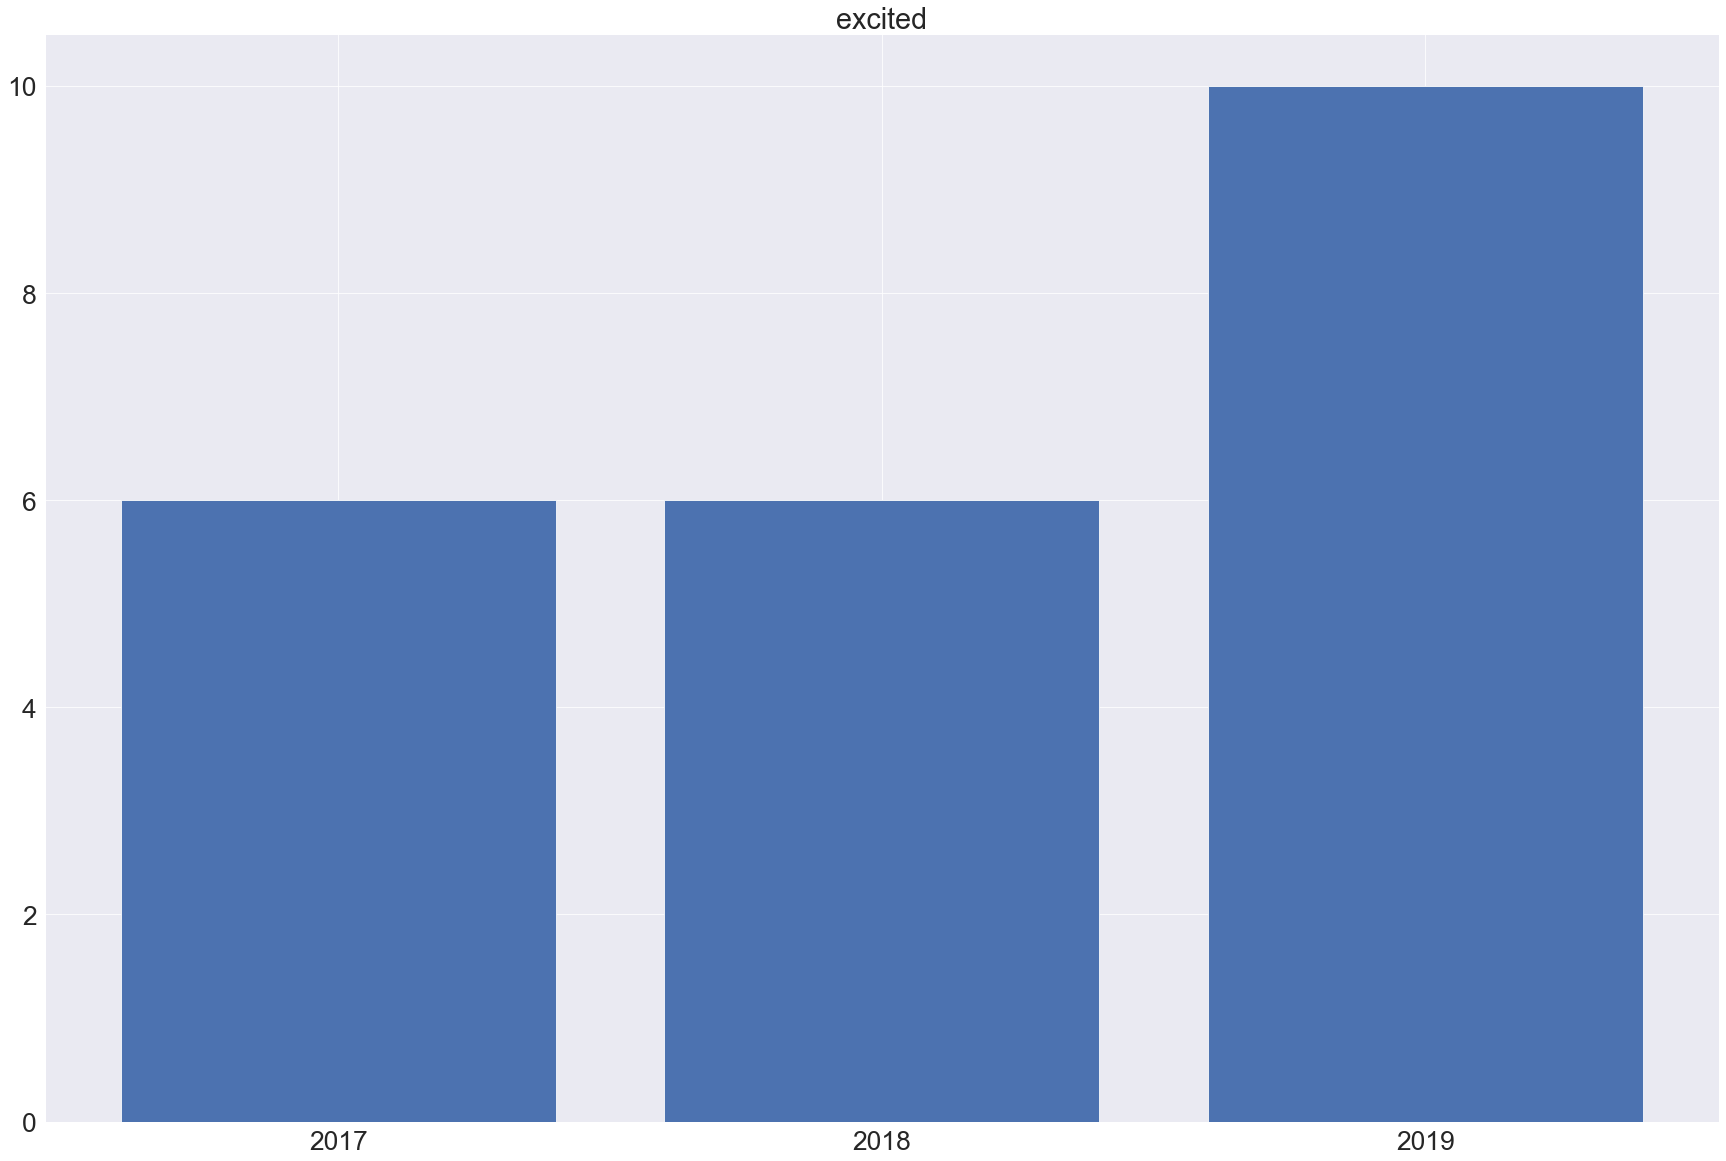

In [58]:
plt.bar(years,excited)
sns.set_context("paper", font_scale=3)
plt.title('excited')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1221c9750>,
 <a list of 3 Text xticklabel objects>)

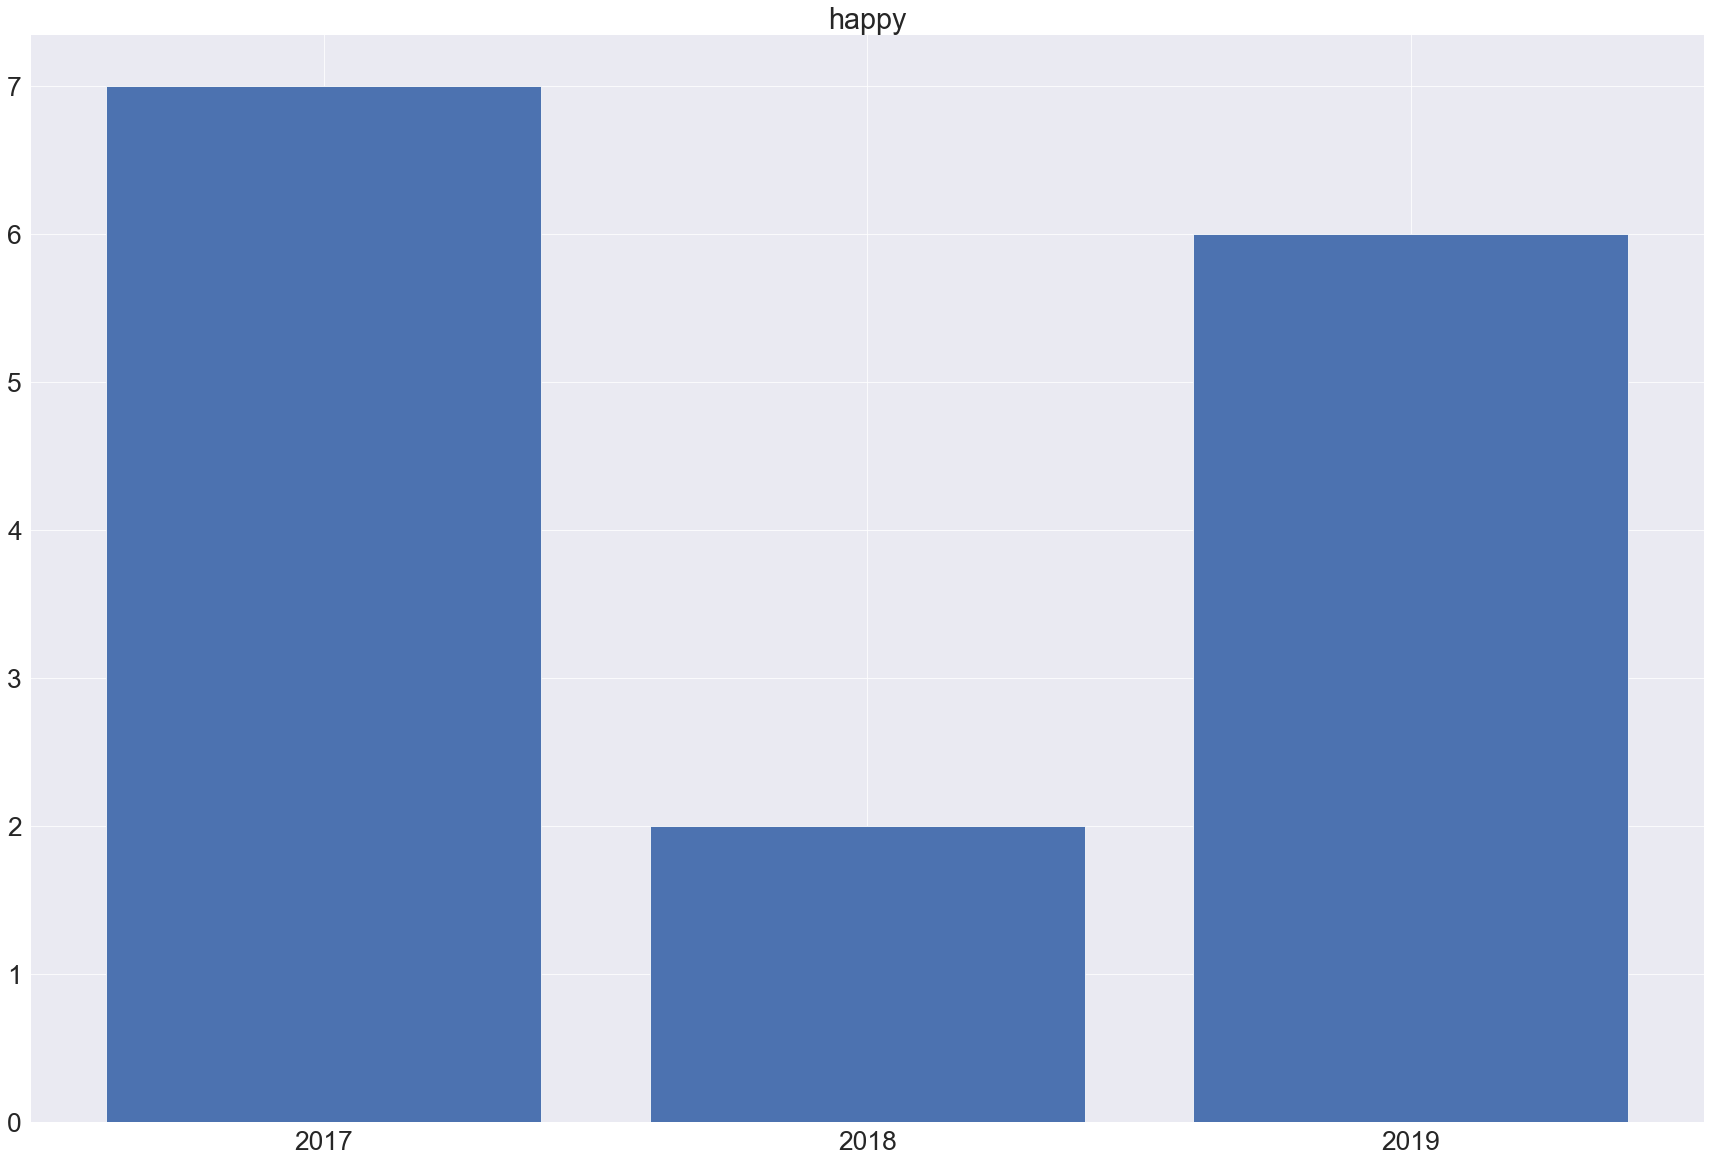

In [59]:
plt.bar(years,happy)
sns.set_context("paper", font_scale=3)
plt.title('happy')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1229cb410>,
 <a list of 3 Text xticklabel objects>)

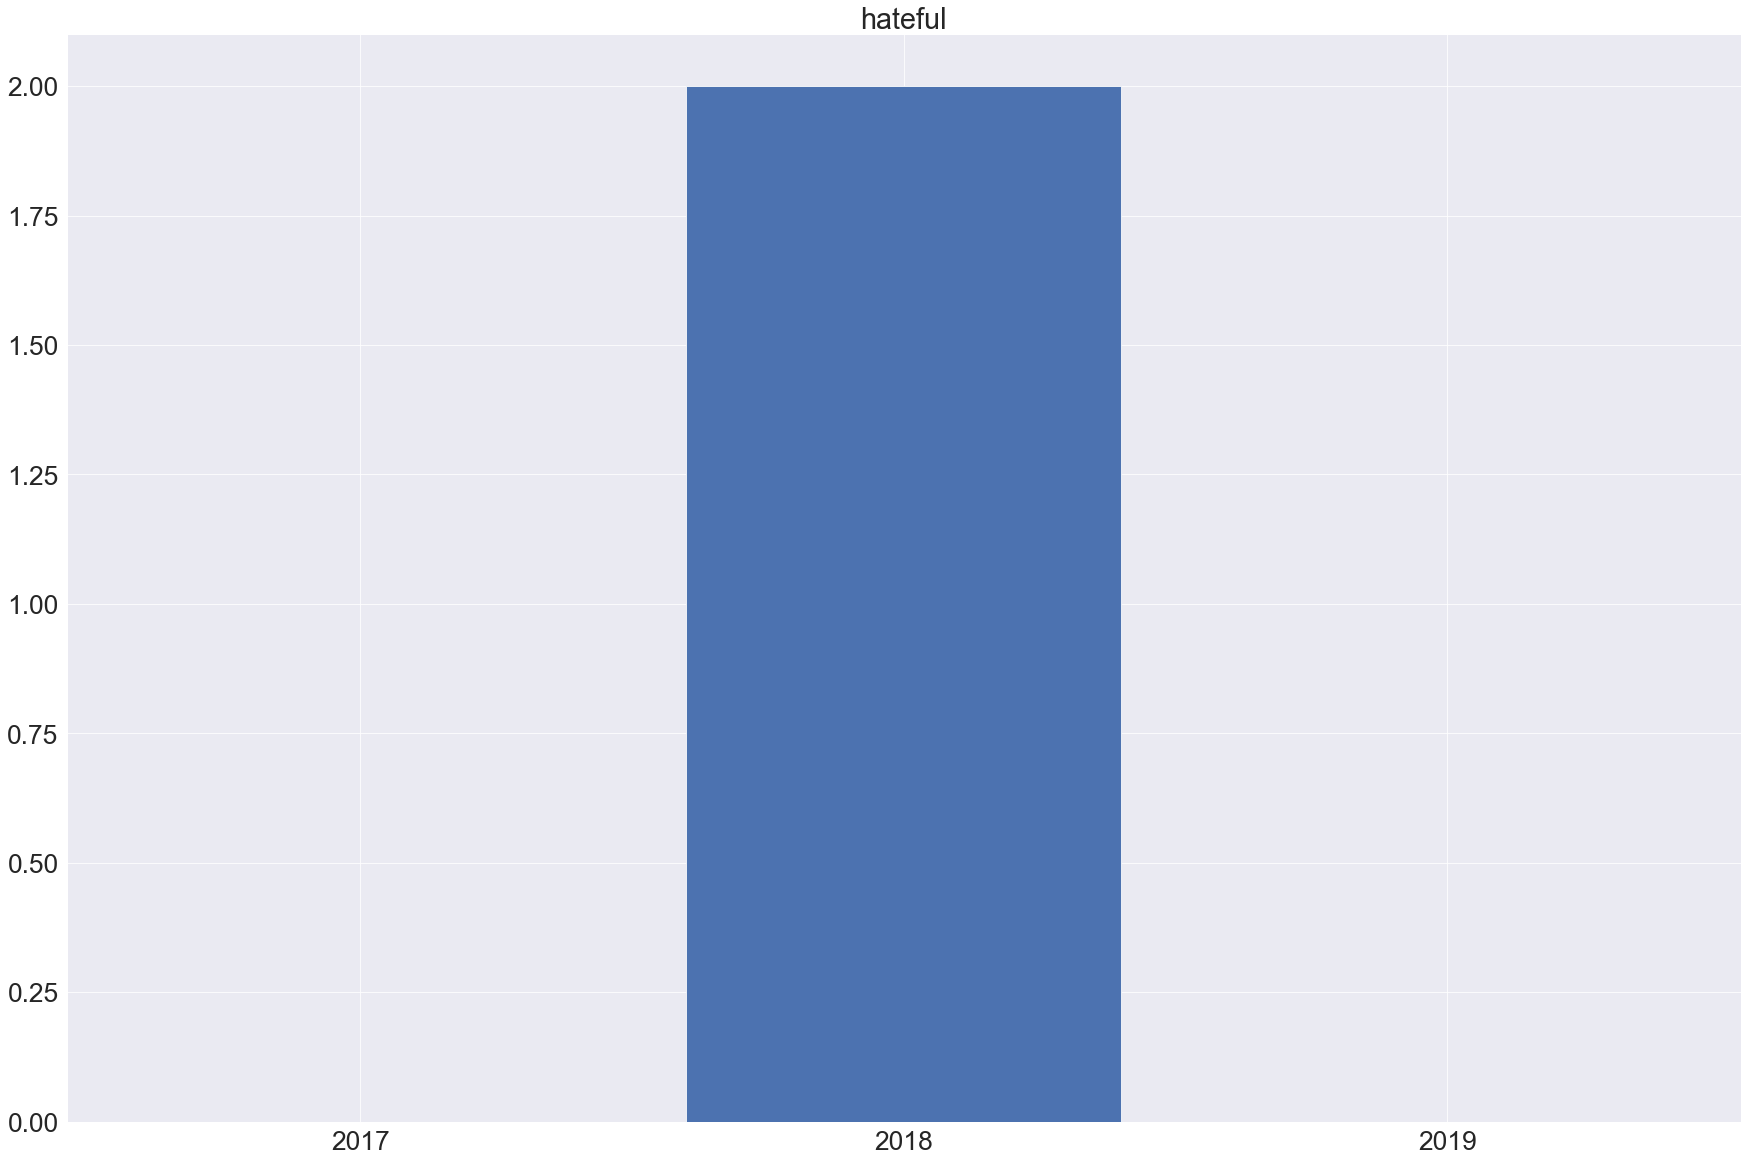

In [60]:
plt.bar(years,hateful)
sns.set_context("paper", font_scale=3)
plt.title('hateful')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1231c1550>,
 <a list of 3 Text xticklabel objects>)

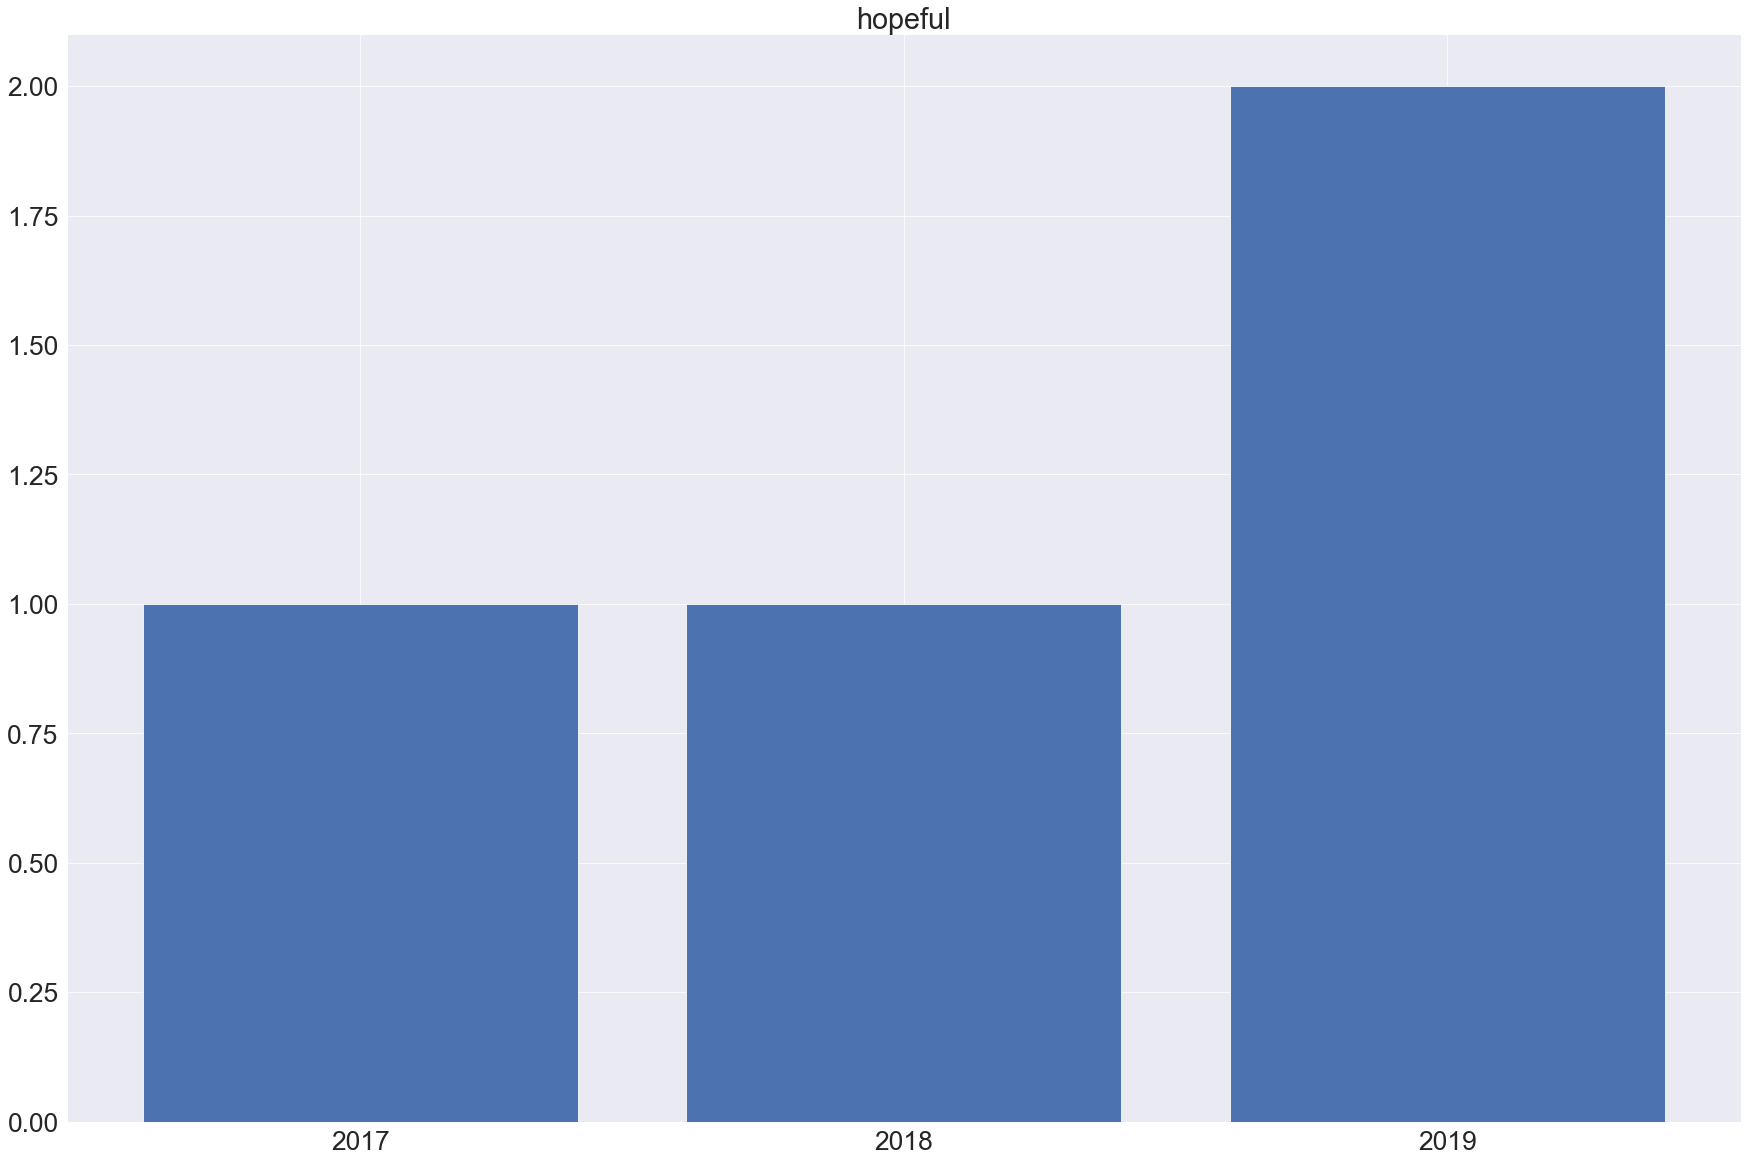

In [61]:
plt.bar(years,hopeful)
sns.set_context("paper", font_scale=3)
plt.title('hopeful')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1239ed290>,
 <a list of 3 Text xticklabel objects>)

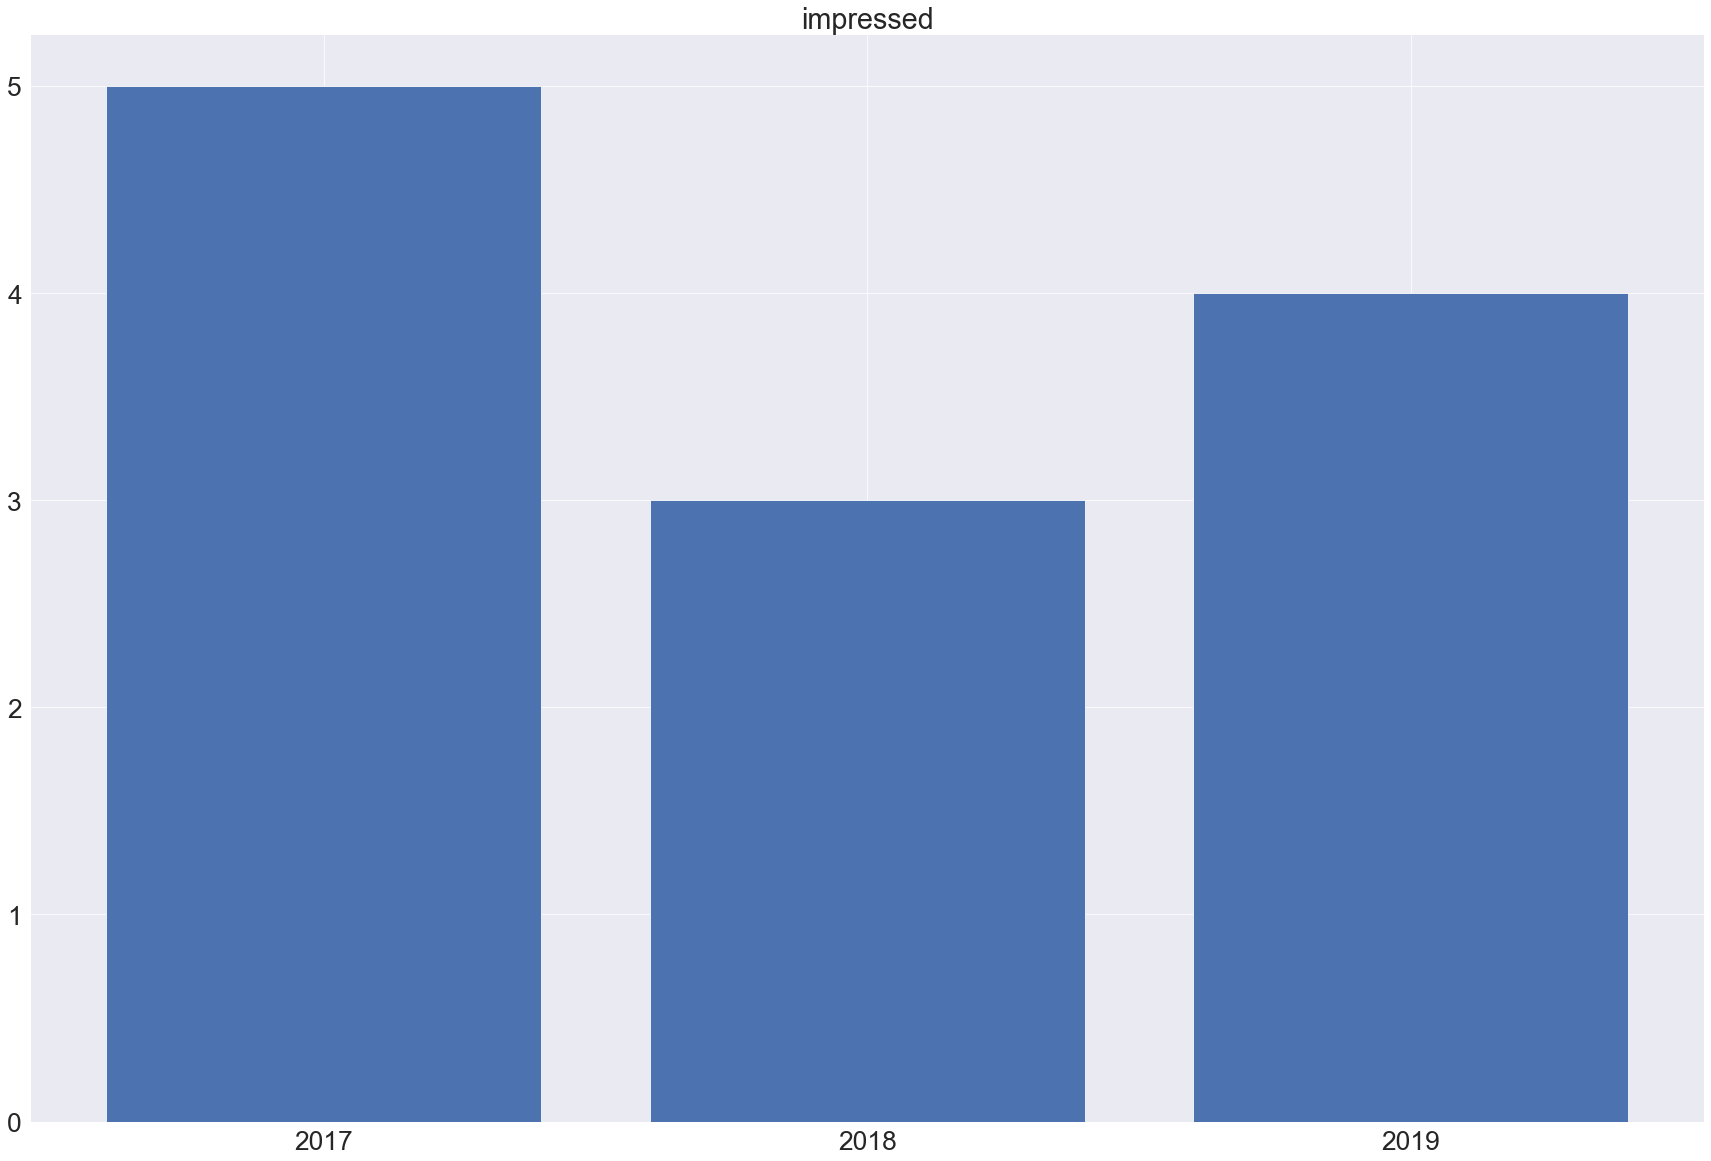

In [62]:
plt.bar(years,impressed)
sns.set_context("paper", font_scale=3)
plt.title('impressed')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1242016d0>,
 <a list of 3 Text xticklabel objects>)

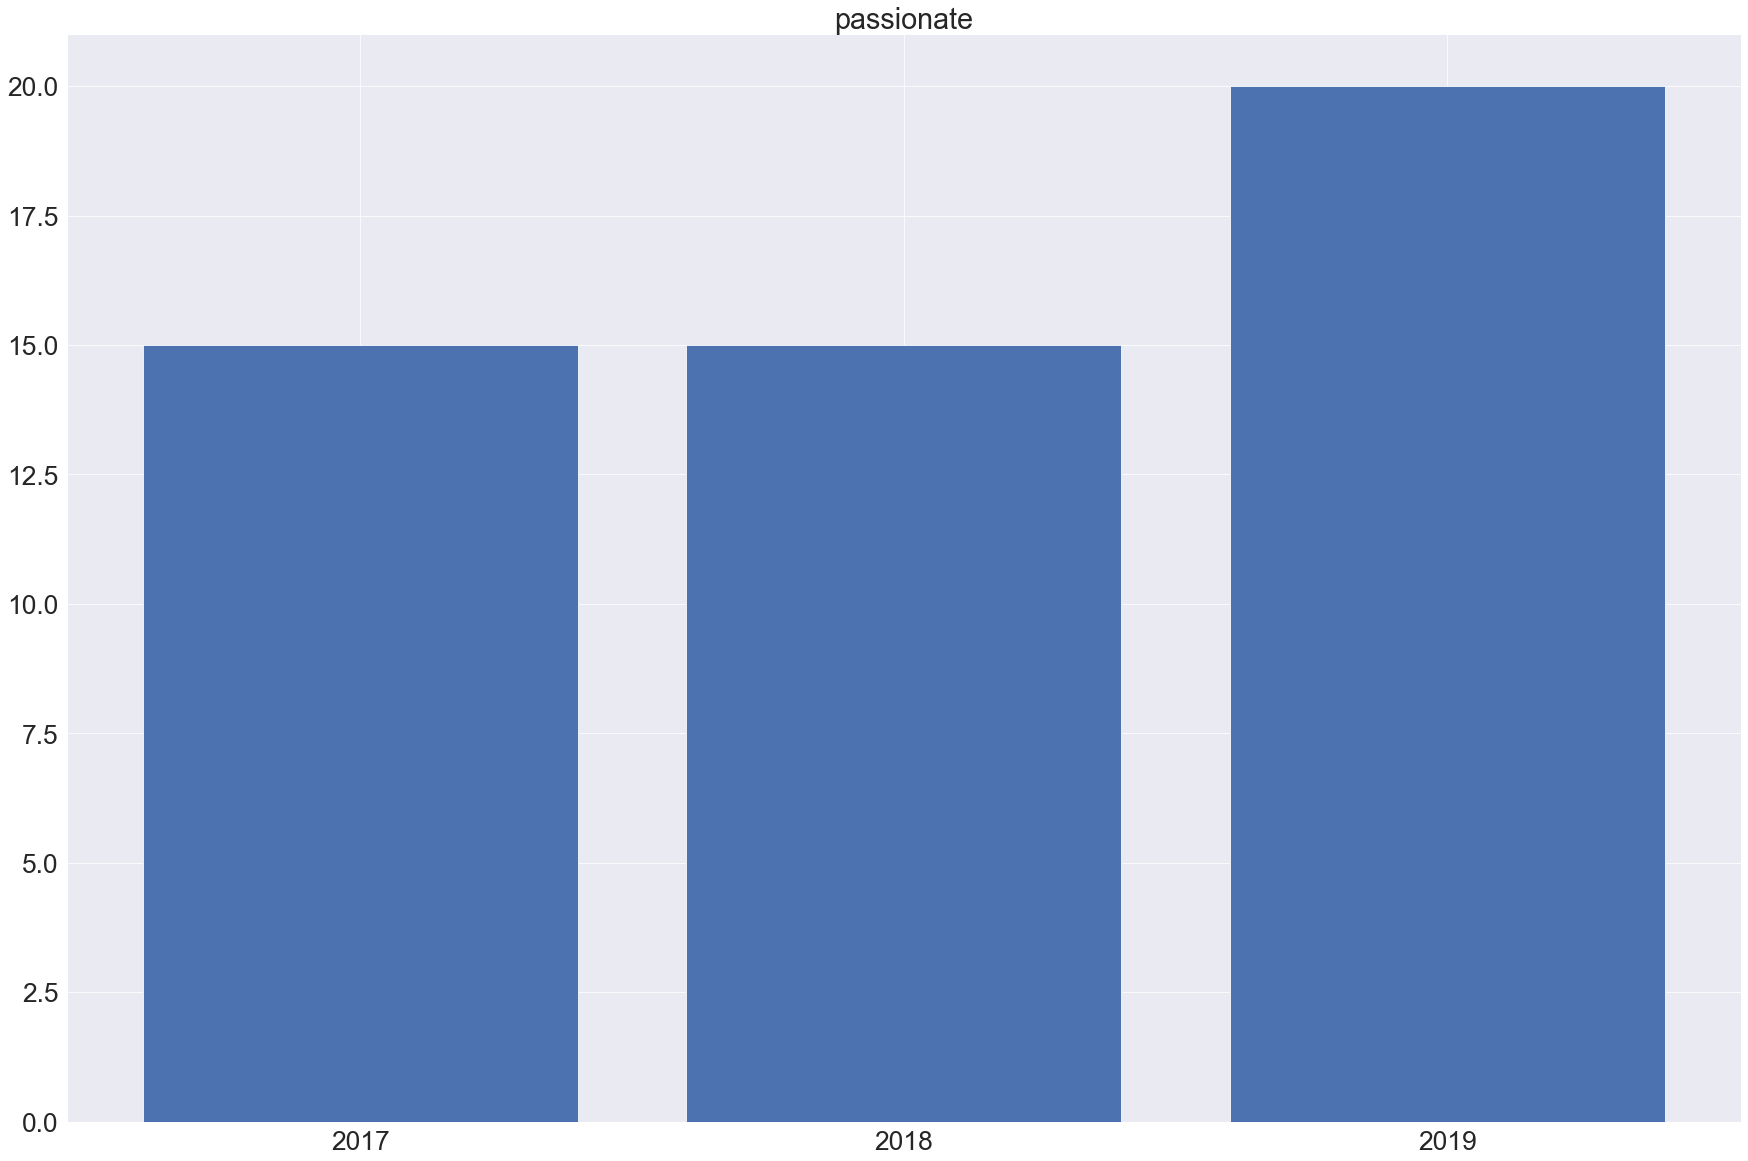

In [63]:
plt.bar(years,passionate)
sns.set_context("paper", font_scale=3)
plt.title('passionate')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x1249e7190>,
 <a list of 3 Text xticklabel objects>)

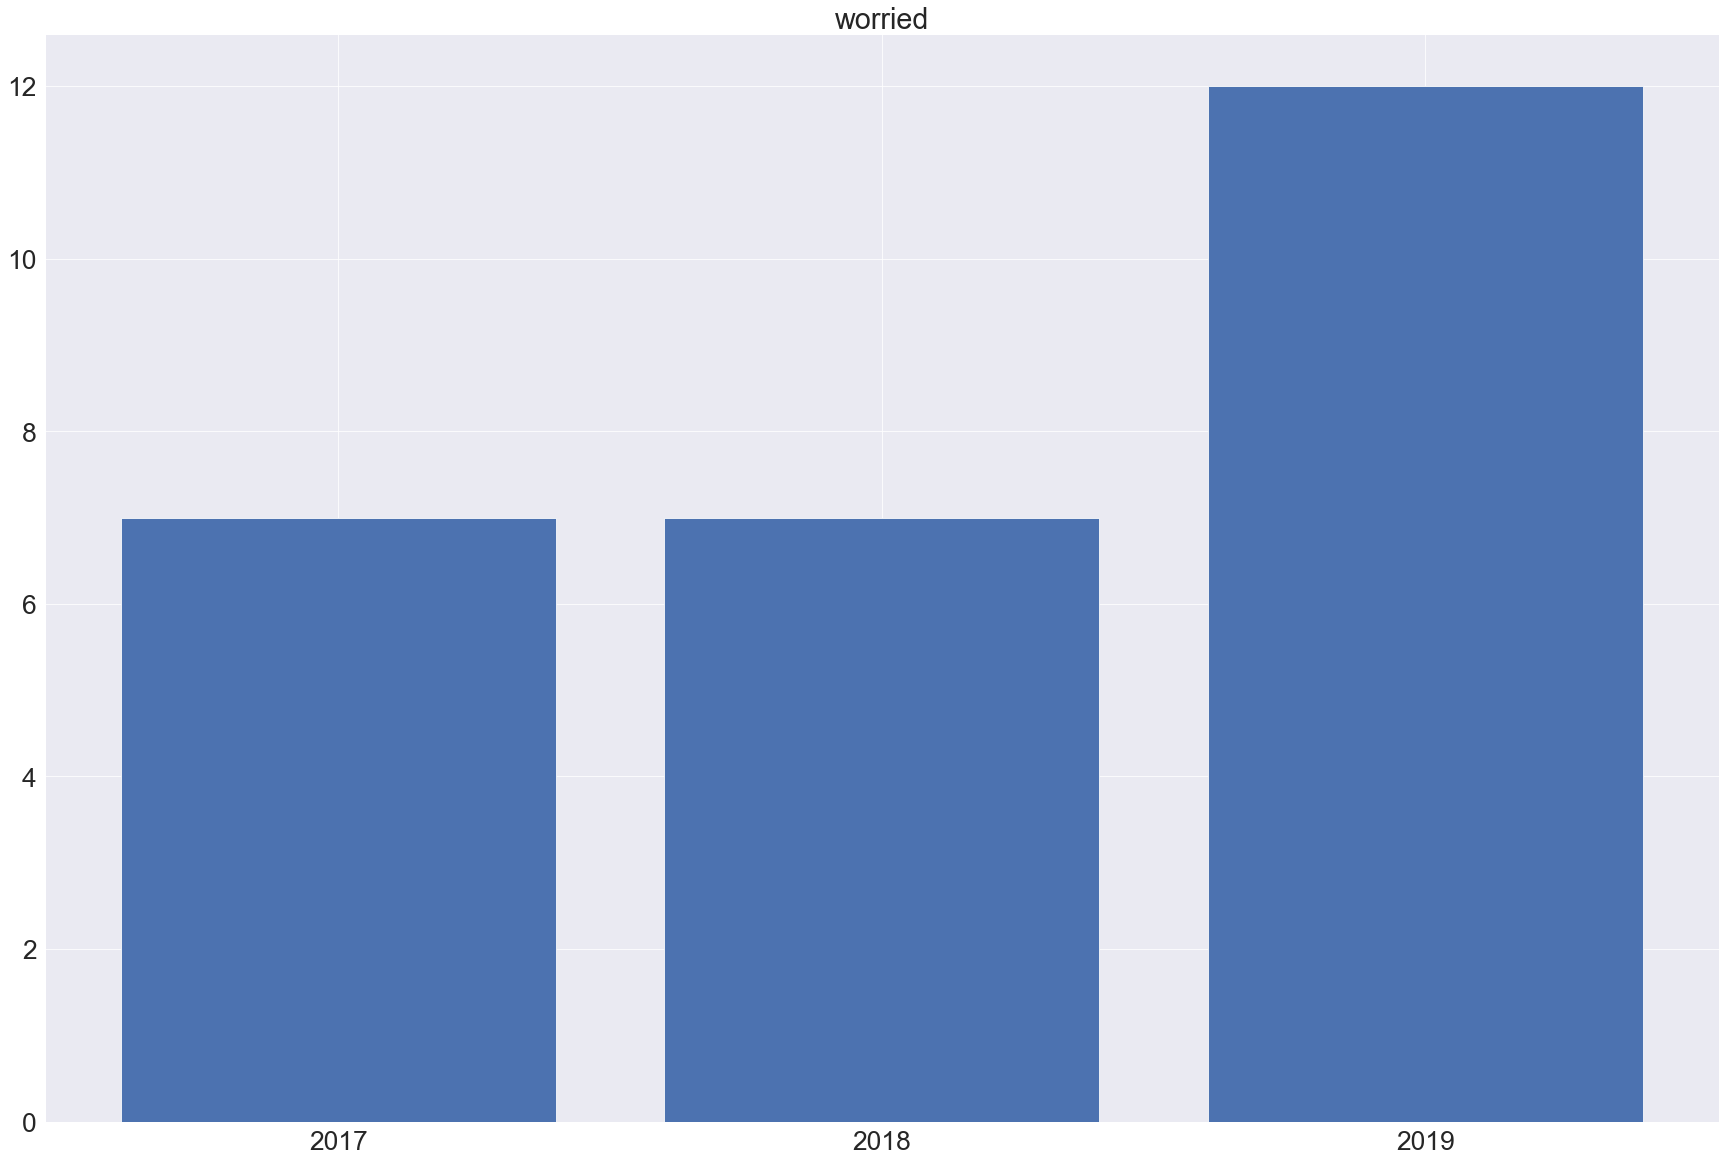

In [64]:
plt.bar(years,worried)
sns.set_context("paper", font_scale=3)
plt.title('worried')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)

([<matplotlib.axis.XTick at 0x12521a6d0>,
 <a list of 3 Text xticklabel objects>)

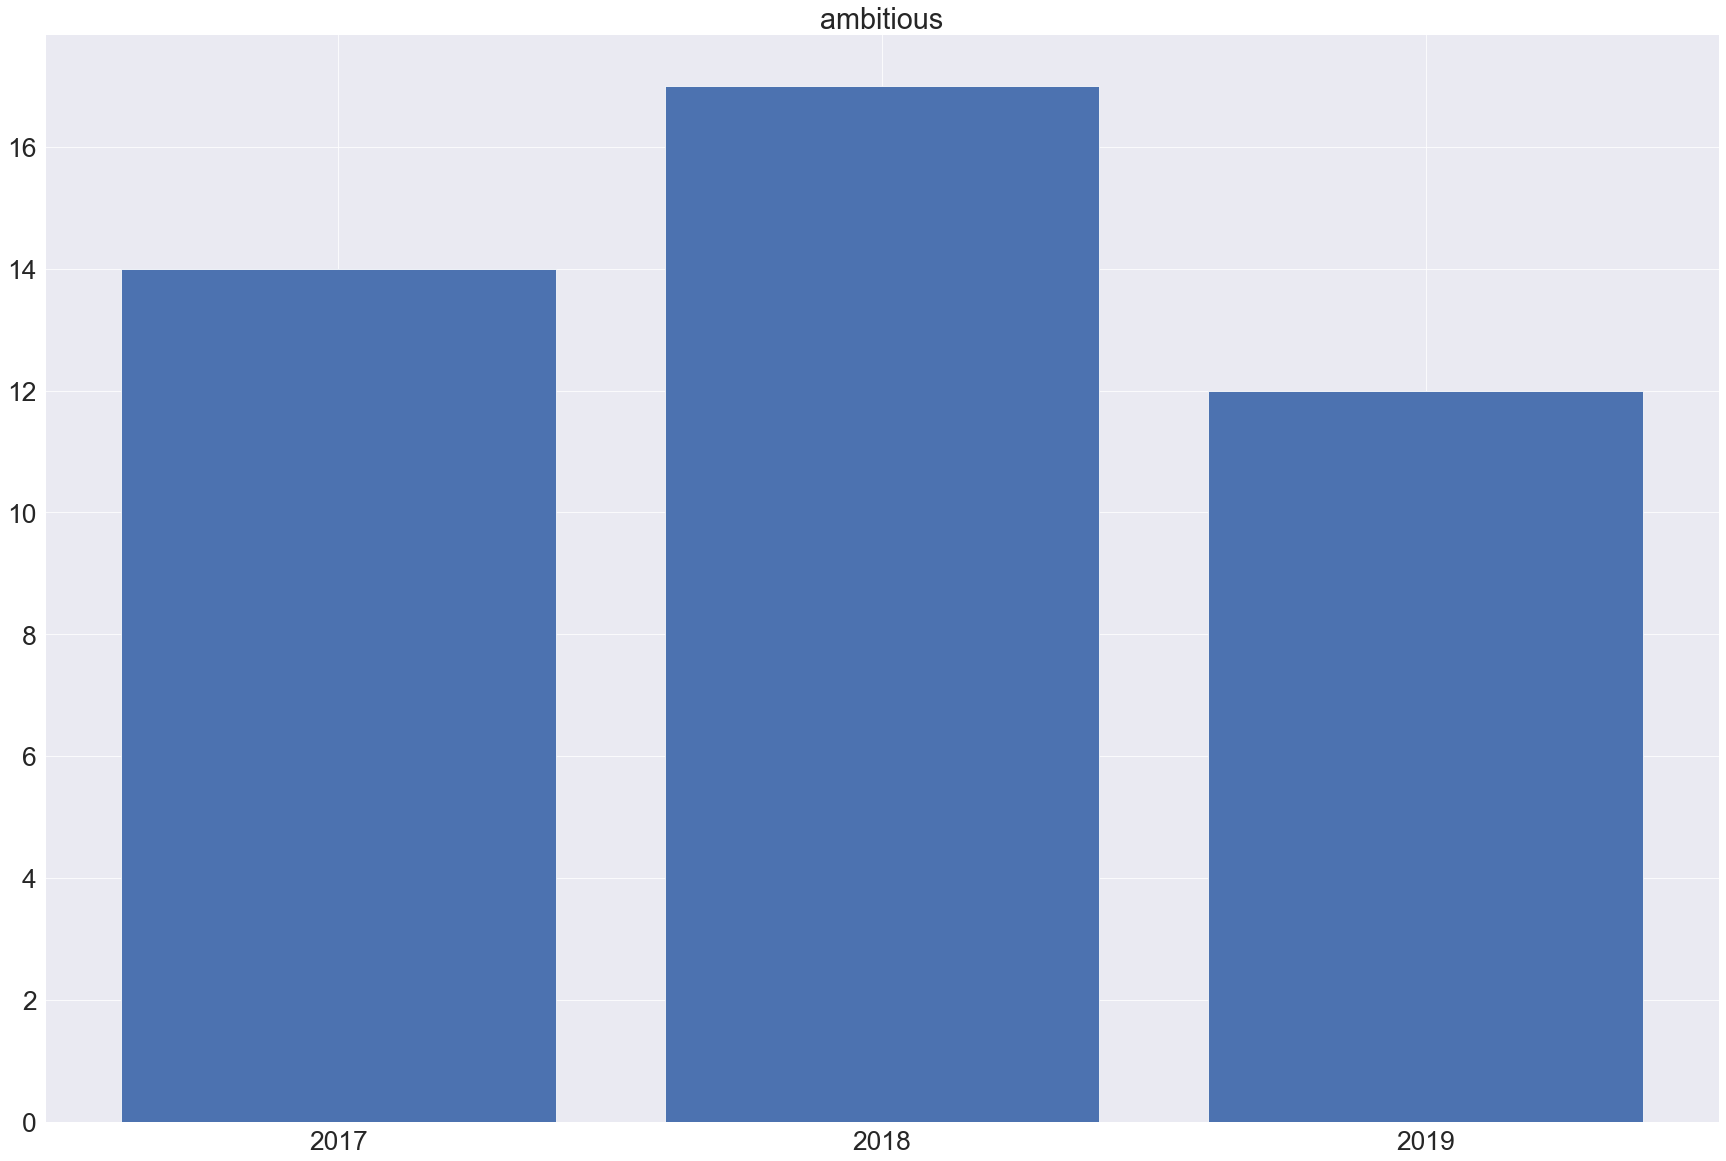

In [65]:
plt.bar(years,ambitious)
sns.set_context("paper", font_scale=3)
plt.title('ambitious')
x=[2017,2018,2019]
my_xticks = ['2017', '2018', '2019']
plt.xticks(x, my_xticks)